In [1]:
#importar libreria pandas
import pandas as pd
from openpyxl import load_workbook, Workbook
from datetime import date
fecha_actual = date.today()
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
# Convertir a string con formato personalizado
fecha_como_string = fecha_actual.strftime('%d-%m-%Y')  # Formato: DD/MM/YYYY

In [2]:
#df=pd.read_excel('Esquema_Regular_PAI (2).xlsx',sheet_name="Reporte Esquema Regular",index_col=0)
df = pd.read_excel('Esquema_Regular_PAI.xlsx',sheet_name="Reporte Esquema Regular",index_col=0,skiprows=4)
df.shape

(62851, 37)

In [3]:
dfcovid=pd.read_excel('ReporteCovid-19 (4).xlsx',sheet_name="Reporte Covid",index_col=0,skiprows=4)
dfcovid.shape

(7302, 36)

Validaciones Covid

In [4]:
vald_cov=dfcovid[(dfcovid['Estado Validación'].isin(["NO VALIDADO"]))]
validaciones_covid = vald_cov.groupby(['Municipio']).size()
validaciones_covid

Municipio
BERMEJO     6
PADCAYA    12
YACUIBA     2
dtype: int64

Produccion Covid

In [5]:
prod_eqr=df.groupby(['Nombre Vacuna']).size()
prod_cov=dfcovid.groupby(['Nombre Vacuna']).size()
prod_eqr=prod_eqr.add(prod_cov,fill_value=0).astype(int)
prod_eqr=prod_eqr.to_frame(name='PRODUCCIÓN')
tot=prod_eqr.sum()
prod_eqr.loc["TOTAL"]=tot
prod_eqr

,PRODUCCIÓN
Nombre Vacuna,
ANTIAMARÍLICA,3944
ANTINEUMOCÓCICA,5898
ANTIPOLIOMIELÍTICA,10311
ANTIROTAVIRÍCA,3986
BCG,2154
COVID-19,7302
DT ADULTO,10652
HEPATITIS,1380
INFLUENZA ESTACIONAL,125


Grafico de Produccion de Vacunas

C:\Users\ALVARO\AppData\Local\Temp\ipykernel_20732\3273151395.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Nombre Vacuna', y='PRODUCCIÓN', data=prod_eqr_reset, palette=colores_aleatorios)


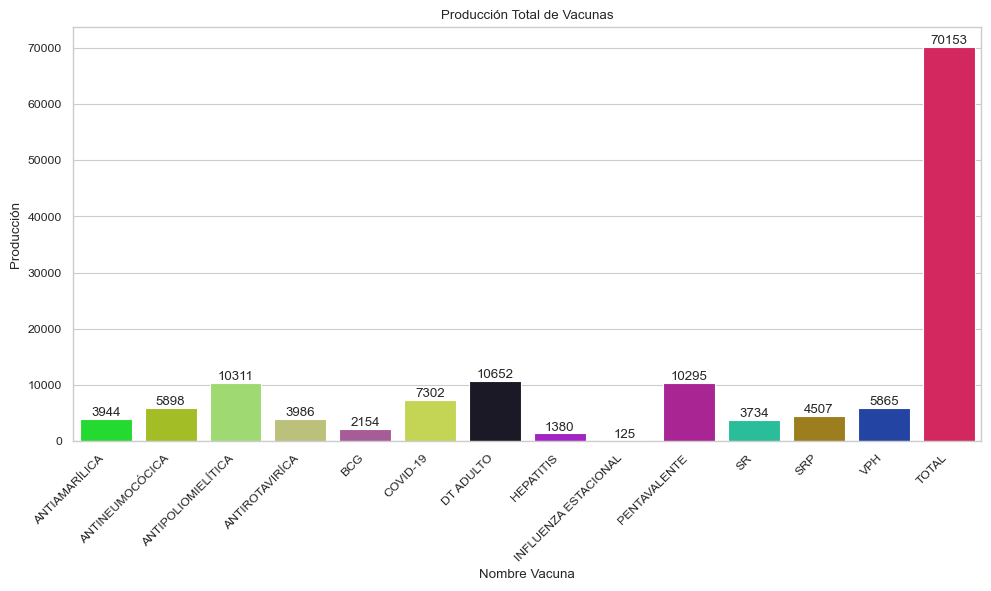

In [6]:
# Reiniciar el índice para que 'Nombre Vacuna' sea una columna
prod_eqr_reset = prod_eqr.reset_index()

# Generar colores hexadecimales aleatorios
colores_aleatorios = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(len(prod_eqr_reset))]

# Establecer el estilo de seaborn
sns.set_style('whitegrid')
sns.set_context('paper')

# Crear el gráfico de barras con seaborn usando la paleta de colores aleatorios
plt.figure(figsize=(10, 6))
sns.barplot(x='Nombre Vacuna', y='PRODUCCIÓN', data=prod_eqr_reset, palette=colores_aleatorios)

# Agregar las cantidades encima de cada barra
for index, row in prod_eqr_reset.iterrows():
    plt.text(index, row['PRODUCCIÓN'], int(row['PRODUCCIÓN']), ha='center', va='bottom')

# Configurar el gráfico
plt.title('Producción Total de Vacunas')
plt.xlabel('Nombre Vacuna')
plt.ylabel('Producción')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Promedio de dias en el Registro

In [7]:
# df["Fecha de Vacunación"] = pd.to_datetime(df["Fecha de Vacunación"], format="%d/%m/%Y")
# df["Fecha Registro"] = pd.to_datetime(df["Fecha Registro"])

# # Calculate the difference in days
# df["Diferencia en Días"] = df["Fecha Registro"] - df["Fecha de Vacunación"]
# df["Diferencia en Días"] =df["Diferencia en Días"].dt.days
# promedio=df.groupby(['Municipio','Establecimiento']).mean('Diferencia en Días')
# promedio

In [8]:
df["Fecha de Vacunación"] = pd.to_datetime(df["Fecha de Vacunación"], format="%d/%m/%Y")
df["Fecha Registro"] = pd.to_datetime(df["Fecha Registro"])

# Calculate the difference in days
df["Diferencia en Días"] = df["Fecha Registro"] - df["Fecha de Vacunación"]
df["Diferencia en Días"] =df["Diferencia en Días"].dt.days
promedio_ = df.pivot_table(
    values=['Diferencia en Días'],
    index=['Municipio'],
    # columns='Diferencia en Días',
    aggfunc={'Diferencia en Días': 'mean'}, # Renombre la clave a 'Estado_Validacion_Conteo'
    margins=True
    # margins_names=True,  # Incluir totales generales y subtotales
    # margins_names={'all': 'Total'}  # Personalizar nombres de totales
)
promedio_ = promedio_.rename(columns={'Diferencia en Días': 'Promedio'})
promedio_['Promedio'] = promedio_['Promedio'].round(1)
promedio_ 

,Promedio
Municipio,
BERMEJO,4.5
CARAPARI,3.3
EL PUENTE(TJA),4.1
ENTRE RIOS TRJ,5.7
PADCAYA,6.4
SAN LORENZO(TJA),3.7
TARIJA,1.3
URIONDO (A. CONCEPCION),6.0
VILLA MONTES,4.9


Vacunas-Lote incorrecto

In [9]:
def verificar_lote_vacunas(df):
    if df['Nombre Vacuna'] == "BCG" and df['Tipo de Item'] == "BCG":
        return ""
    elif df['Nombre Vacuna'] == "PENTAVALENTE" and df['Tipo de Item'] == "PENTAVALENTE":
        return ""
    elif df['Nombre Vacuna'] == "ANTINEUMOCÓCICA" and df['Tipo de Item'] == "ANTI - NEOMOCOCICA":
        return ""
    elif df['Nombre Vacuna'] == "INFLUENZA ESTACIONAL" and df['Edad (Años)']<= 2 and df['Tipo de Item'] == "INFLUENZA - PEDIATRICA":
        return ""
    elif df['Nombre Vacuna'] == "INFLUENZA ESTACIONAL" and df['Edad (Años)']>= 3 and df['Tipo de Item'] == "INFLUENZA - ADULTO":
        return ""
    elif df['Nombre Vacuna'] == "ANTIAMARÍLICA" and df['Tipo de Item'] == "ANTI - AMARILICA (10 DOSIS)":
        return ""
    elif df['Nombre Vacuna'] == "SRP" and df['Tipo de Item'] == "SRP (UNIDOSIS)":
        return ""
    elif df['Nombre Vacuna'] == "VPH" and df['Tipo de Item'] == "VPH":
        return ""
    elif df['Nombre Vacuna'] == "COVID-19" and df['Tipo de Item'] == "PENTAVALENTE":
        return ""
    elif df['Nombre Vacuna'] == "DT ADULTO" and df['Tipo de Item'] == "DT. ADULTO":
        return ""
    elif df['Nombre Vacuna'] == "SR" and df['Tipo de Item'] == "SR (UNIDOSIS)":
        return ""
    elif df['Nombre Vacuna'] == "HEPATITIS" and df['Tipo de Item'] == "HEPATITIS B":
        return ""
    elif df['Nombre Vacuna'] == "ANTIPOLIOMIELÍTICA" and df['Nro. de Dosis'] == "1ra. DOSIS IPV" and df['Tipo de Item'] == "IPV (5 DOSIS)":
        return ""
    elif df['Nombre Vacuna'] == "ANTIPOLIOMIELÍTICA" and df['Nro. de Dosis'] == "1ra. DOSIS IPV REFUERZO" and df['Tipo de Item'] == "IPV (5 DOSIS)":
        return ""
    elif df['Nombre Vacuna'] == "ANTIPOLIOMIELÍTICA" and df['Nro. de Dosis'] == "2da. DOSIS IPV REFUERZO" and df['Tipo de Item'] == "IPV (5 DOSIS)":
        return ""
    elif df['Nombre Vacuna'] == "ANTIPOLIOMIELÍTICA" and df['Nro. de Dosis'] == "2da. DOSIS OPV" and df['Tipo de Item'] == "ANTIPOLIO BOPV":
        return ""
    elif df['Nombre Vacuna'] == "ANTIPOLIOMIELÍTICA" and df['Nro. de Dosis'] == "3ra. DOSIS IPV" and df['Tipo de Item'] == "IPV (5 DOSIS)":
        return ""
    elif df['Nombre Vacuna'] == "ANTIPOLIOMIELÍTICA" and df['Nro. de Dosis'] == "4ta. DOSIS OPV" and df['Tipo de Item'] == "ANTIPOLIO BOPV":
        return ""
    elif df['Nombre Vacuna'] == "ANTIPOLIOMIELÍTICA" and df['Nro. de Dosis'] == "5ta. DOSIS OPV" and df['Tipo de Item'] == "ANTIPOLIO BOPV":
        return ""
    elif df['Nombre Vacuna'] == "ANTIPOLIOMIELÍTICA" and df['Nro. de Dosis'] == "REFUERZO" and df['Tipo de Item'] == "ANTIPOLIO BOPV":
        return ""
    elif df['Nombre Vacuna'] == "ANTIROTAVIRÍCA" and df['Tipo de Item'] == "ANTIROTAVIRUS":
        return ""
    else:
        return "error de SELECCION de LOTE de vacuna"
df_copia = df.copy()
df_copia['Lote'] = df_copia.apply(verificar_lote_vacunas, axis=1)
sndy=df_copia[(df_copia['Lote']=="error de SELECCION de LOTE de vacuna")]
sndy=sndy.groupby(['Municipio']).size()
# sndy.to_excel('sn_diluyente.xlsx',sheet_name='diluyente')
sndy=sndy.to_frame(name="LOTE_INC")
sndy

,LOTE_INC
Municipio,


Vacunas sin Jeringa

In [10]:
snj1=df[(df['Nombre Vacuna'].isin(['ANTIAMARÍLICA','ANTINEUMOCÓCICA','BCG','DT ADULTO','HEPATITIS',
                           'INFLUENZA ESTACIONAL','PENTAVALENTE','HEPATITIS ','SR','SRP','VPH']))& (df['Item de la Jeringa'].isnull())]
snj2=df[(df['Nro. de Dosis'].isin(['1ra. DOSIS IPV','1ra. DOSIS IPV REFUERZO','2da. DOSIS IPV REFUERZO'
                           ,'3ra. DOSIS IPV','REFUERZO']))& (df['Item de la Jeringa'].isnull())]
df_snj = pd.concat([snj1, snj2], ignore_index=True)
df_snj=df_snj.groupby(['Municipio']).size()
df_snj=df_snj.to_frame(name="SN-ADM")
df_snj

,SN-ADM
Municipio,


In [11]:
df_snj1=df[(df['Nombre Vacuna'].isin(['ANTIAMARÍLICA','ANTINEUMOCÓCICA','BCG','DT ADULTO','HEPATITIS',
                           'INFLUENZA ESTACIONAL','PENTAVALENTE','HEPATITIS ','SR','SRP','VPH'])) & 
                           (df['Nro. de Dosis'].isin(['1ra. DOSIS','2da. DOSIS','3ra. DOSIS','3ra. DOSIS (REFUERZO)',
                            '4ta. DOSIS','5ta. DOSIS','DOSIS UNICA','REFUERZO','REFUERZO (2da. DOSIS)','1ra. DOSIS IPV',
                            '1ra. DOSIS IPV REFUERZO','2da. DOSIS IPV REFUERZO','3ra. DOSIS IPV']))& (df['Item de la Jeringa'].isnull())]
df_snj1=df_snj1.groupby(['Municipio']).size()
df_snj1

Series([], dtype: int64)

Vacunas Jeringas incorrectas

In [12]:
def verificar_jeringa(df):
    if df['Nombre Vacuna'] == "BCG":
        if df['Edad (Años)'] == 0:
            if df['Item de la Jeringa'] == "26G X 3/8 0.05 ML(BCG)":
                return ""
            elif df['Item de la Jeringa'] == "27G X 3/8 (BCG)":
                return "Cambiar Jeringa de Administracion a-> 26G X 3/8 0.05 ML(BCG)"
        elif df['Edad (Años)'] <= 4:
            if df['Item de la Jeringa'] == "27G X 3/8 (BCG)":
                return ""
            elif df['Item de la Jeringa'] == "26G X 3/8 0.05 ML(BCG)":
                return "Cambiar Jeringa de Administracion a-> 27G X 3/8 (BCG)"    
    elif df['Nombre Vacuna'] in ["PENTAVALENTE", "ANTINEUMOCÓCICA"] and df['Item de la Jeringa'] == "23G X 0,5ML ":
        return ""    
    elif df['Nombre Vacuna'] == "INFLUENZA ESTACIONAL":
        if df['Edad (Años)'] <= 2 and df['Item de la Jeringa'] == "23G X 1ML (INF.PED)":
            return ""
        elif df['Edad (Años)'] >= 3 and df['Item de la Jeringa'] in ["22G X 0,5ML", "22G X 1ML", "23G X 0,5ML "]:
            return ""    
    elif df['Nombre Vacuna'] == "ANTIAMARÍLICA" and df['Item de la Jeringa'] in ["25G X 5/8 0,5ML", "25G X 1 ML"]:
        return ""    
    elif df['Nombre Vacuna'] == "SRP":
        if df['Item de la Jeringa'] in ["25G X 5/8 0,5ML", "25G X 1 ML"]:
            return ""    
    elif df['Nombre Vacuna'] == "VPH" and df['Item de la Jeringa'] in ["22G X 0,5ML", "22G X 1ML", "25G X 1 ML"]:
        return ""    
    elif df['Nombre Vacuna'] == "COVID-19":
        if df['Edad (Años)'] >= 12 and df['Item de la Jeringa'] == "23G X 1 (0.3 ML PFIZER ADULTO)":
            return ""
        elif df['Edad (Años)'] <= 11 and df['Item de la Jeringa'] == "23G X 1 (0,2ML PFIZER PEDIATRICO)":
            return ""    
    elif df['Nombre Vacuna'] == "DT ADULTO" and df['Item de la Jeringa'] in ["22G X 0,5ML", "22G X 1ML", "23G X 0,5ML "]:
        return ""    
    elif df['Nombre Vacuna'] == "SR" and df['Item de la Jeringa'] in ["25G X 5/8 0,5ML", "25G X 1 ML"]:
        return ""    
    elif df['Nombre Vacuna'] == "HEPATITIS" and df['Item de la Jeringa'] == "22G X 1ML":
        return ""    
    elif df['Nombre Vacuna'] == "ANTIPOLIOMIELÍTICA":
        if df['Nro. de Dosis'] in ["1ra. DOSIS IPV", "1ra. DOSIS IPV REFUERZO", "2da. DOSIS IPV REFUERZO", "3ra. DOSIS IPV"] and df['Item de la Jeringa'] == "23G X 0,5ML ":
            return ""
        elif df['Nro. de Dosis'] in ["2da. DOSIS OPV", "4ta. DOSIS OPV", "5ta. DOSIS OPV", "REFUERZO"] and pd.isna(df['Item de la Jeringa']):
            return ""
    
    elif df['Nombre Vacuna'] == "ANTIROTAVIRÍCA" and pd.isna(df['Item de la Jeringa']):
        return ""
    
    return "Corregir jeringa de administracion"

# Ejemplo de uso
df_jer= df.copy()
df_jer['Jeringa']=df_jer.apply(verificar_jeringa,axis=1)
jer_inc=df_jer[(df_jer['Jeringa']!="")]
jer_inc=jer_inc.groupby(['Municipio']).size()
jer_inc=jer_inc.to_frame(name='Jer-Inc')
jer_inc

,Jer-Inc
Municipio,
TARIJA,116


Vacunas Sin diluyete("BCG", "ANTIAMARÍLICA", "SRP", "COVID-19", "SR")

In [13]:
df_copiar = df.copy()
def verificar_lote_diluyente(df):
    if df['Nombre Vacuna'] in ["BCG", "ANTIAMARÍLICA", "SRP", "SR"]:
        if not pd.isna(df['Lote Diluyente']):
            return ""
        else:
            return "Falta lote de diluyente"
    return ""

# Aplicar la función al DataFrame
df_copiar['diluyente'] = df_copiar.apply(verificar_lote_diluyente, axis=1)
sndyy=df_copiar[(df_copiar['diluyente']=="Falta lote de diluyente")]
sndyy=sndyy.groupby(['Municipio']).size()
sndyy=sndyy.to_frame(name="SN-DIL")
sndyy

,SN-DIL
Municipio,
CARAPARI,1


Vacunas que no llevan diluyente con geringa de Dilucion

In [14]:
cnjd=df[(df['Nombre Vacuna'].isin(['ANTINEUMOCÓCICA','ANTIPOLIOMIELÍTICA','','DT ADULTO','HEPATITIS',
      'INFLUENZA ESTACIONAL','PENTAVALENTE','HEPATITIS ','VPH','ANTIROTAVIRÍCA']))& ~(df['Jeringa de Dilusión'].isnull())]
cnjd=cnjd.groupby(['Municipio','Establecimiento','Nombre Completo','Fecha de Vacunación','Edad (Años)','Nombre Vacuna', 'Nro. de Dosis','Item de la Jeringa'
                       ,'Jeringa de Dilusión','Usuario']).size()
cnjd

Series([], dtype: int64)

Vacunas que no llevan diluyete(con diluyente)

In [15]:
cndy=df[(df['Nombre Vacuna'].isin(['ANTINEUMOCÓCICA','ANTIPOLIOMIELÍTICA','','DT ADULTO','HEPATITIS',
                           'INFLUENZA ESTACIONAL','PENTAVALENTE','HEPATITIS ','VPH','ANTIROTAVIRÍCA']))& ~(df['Lote Diluyente'].isnull())]
cndy=cndy.groupby(['Municipio']).size()
cndy

Series([], dtype: int64)

Jeringa de Diluyente(Con/Sin)*************************************************

In [16]:
def verificar_jeringa_dilucion(df):   
    
    if df['Item de la Jeringa'] in ["SR (UNIDOSIS)", "SRP (UNIDOSIS)"]:
        if pd.isna(df['Jeringa de Dilusión']):
            return "Falta jeringa de dilución"
        else:
            return ""
    elif df['Item de la Jeringa'] in ["ANTI - AMARILICA (10 DOSIS)", "BCG"]:
        if pd.isna(df['Jeringa de Dilusión']) or not pd.isna(df['Jeringa de Dilusión']):
            return ""
    elif df['Item de la Jeringa'] in ["ANTI - NEOMOCOCICA", "ANTIPOLIO BOPV", "IPV (5 DOSIS)", "ANTIROTAVIRUS", "DT. ADULTO", 
                "HEPATITIS B", "INFLUENZA - ADULTO", "INFLUENZA - PEDIATRICA", "PENTAVALENTE", "VPH"]:
        if pd.isna(df['Jeringa de Dilusión']):
            return ""
        else:
            return "ELIMINAR jeringa de dilución"
    return ""

# Aplicar la función al DataFrame
df['resultado'] = df.apply(verificar_jeringa_dilucion, axis=1)

Validacion de datos

In [17]:
#df.groupby(['Municipio', 'Estado Validación']).size()

In [18]:
vald=df[(df['Estado Validación'].isin(["NO VALIDADO"]))]
validaciones = vald.pivot_table(
    values=['Nro. de Dosis'],
    index=['Municipio'],
    columns='Estado Validación',
    aggfunc={'Nro. de Dosis': 'count'}, # Renombre la clave a 'Estado_Validacion_Conteo'
    margins=True, #este codigo pone los totales
    # margins_names=True,  # Incluir totales generales y subtotales
    #margins_name={'all': 'Total'}  # Personalizar nombres de totales
)
validaciones.columns = validaciones.columns.droplevel(0)
validaciones

Estado Validación,NO VALIDADO,All
Municipio,,
BERMEJO,150,150
CARAPARI,28,28
PADCAYA,188,188
SAN LORENZO(TJA),18,18
TARIJA,1,1
YACUIBA,882,882
All,1267,1267


Conteo de registros

In [19]:
conteo = df.pivot_table(
    values=['Nro. de Dosis'],
    index=['Municipio'],
    aggfunc={'Nro. de Dosis': 'count'}, # Renombre la clave a 'Estado_Validacion_Conteo'
    margins=True
    # margins_names=True,  # Incluir totales generales y subtotales
    # margins_names={'all': 'Total'}  # Personalizar nombres de totales
)
conteo = conteo.rename(columns={'Nro. de Dosis': 'Cantidad'})
conteo

,Cantidad
Municipio,
BERMEJO,4613
CARAPARI,1841
EL PUENTE(TJA),968
ENTRE RIOS TRJ,2383
PADCAYA,1504
SAN LORENZO(TJA),2463
TARIJA,28884
URIONDO (A. CONCEPCION),1766
VILLA MONTES,6781


In [20]:
valida=df[df['Estado Validación']=='NO VALIDADO']
valida=valida.groupby(['Municipio']).size()
valida = valida.add(validaciones_covid,fill_value=0).astype(int)
valida=valida.to_frame(name='NO_VAl')
valida



,NO_VAl
Municipio,
BERMEJO,156
CARAPARI,28
PADCAYA,200
SAN LORENZO(TJA),18
TARIJA,1
YACUIBA,884


DUPLICADOS (EL EQR NO HAY FECHA DE NACIMIENTO Y CARNET DE IDENTIDAD)

In [21]:
duplicados2 = df.duplicated(subset=['Nombre Completo','Nombre Vacuna', 'Nro. de Dosis'
                          ,'Edad (Años)','Fecha de Nacimiento'])

# Mostrar solo las filas duplicadas
filas_duplicadas = df[duplicados2]
filas_duplicadas=filas_duplicadas.groupby(['Municipio']).size()
filas_duplicadas=filas_duplicadas.to_frame(name="Dupl")
filas_duplicadas

,Dupl
Municipio,
TARIJA,1


Personal de Salud menor a 18 años

In [22]:
sisaal=df[df['Personal Salud']=='SI']
sisaal=sisaal[sisaal['Edad (Años)']<18]
df_salu = sisaal.groupby(['Municipio']).size()
df_salu=df_salu.to_frame(name="PER_<18")
df_salu

,PER_<18
Municipio,
YACUIBA,2


Registros antes del Acto de Vacunacion

In [23]:
# Convert the dates to DateTime format
df["Fecha de Vacunación"] = pd.to_datetime(df["Fecha de Vacunación"], format="%d/%m/%Y")
df["Fecha Registro"] = pd.to_datetime(df["Fecha Registro"])

# Calculate the difference in days
df["Diferencia en Días"] = df["Fecha Registro"] - df["Fecha de Vacunación"]
df["Diferencia en Días"] =df["Diferencia en Días"].dt.days
dif_dia=df[df["Diferencia en Días"]<0]
dif_dia=dif_dia.groupby(['Municipio']).size()
dif_dia=dif_dia.to_frame(name="REG-ANT")
dif_dia
# dif_dia.to_excel('duplicados-18-07.xlsx',sheet_name='Reg_antes_vac2')

,REG-ANT
Municipio,


Embarazadas Fuera de Rango 13-50 Años

In [24]:
emb=df[df['Embarazo']=='SI']
emb=emb[(emb['Edad (Años)'] <= 14) | (emb['Edad (Años)'] >= 50)]
emb=emb.groupby(['Municipio']).size()
emb=emb.to_frame(name="EMB-13<>50")
emb

,EMB-13<>50
Municipio,
BERMEJO,1
PADCAYA,3
TARIJA,11
URIONDO (A. CONCEPCION),1
VILLA MONTES,4
YACUIBA,2


Vacunaciones realizadas a mujeres Embarazadas(Exeptuando DT-Influenza)

In [25]:
emba=df[df['Embarazo']=='SI']
emba=emba[(emba['Nombre Vacuna'] != 'DT ADULTO') & (emba['Nombre Vacuna'] != 'INFLUENZA ESTACIONAL')]
emba=emba.groupby(['Municipio']).size()
emba=emba.to_frame(name="EMB-EXP-DT&INF")
emba

,EMB-EXP-DT&INF
Municipio,
PADCAYA,1
TARIJA,4


Enfermedad de Base en menores a 5 años

In [26]:
menore=df[df['Enfermedad Base']=='SI']
menore=menore[menore['Edad (Años)']< 5]
menore=menore.groupby(['Municipio']).size()
menore=menore.to_frame(name="ENF-BASE<4")
menore

,ENF-BASE<4
Municipio,
ENTRE RIOS TRJ,2
SAN LORENZO(TJA),2
TARIJA,2
VILLA MONTES,3
YACUIBA,2


Integralidad 1ra dosis Menor a 1  Año

In [27]:
edad0=df[(df['Edad (Años)']==0) & (df['Nombre Vacuna'].isin(['PENTAVALENTE','ANTIPOLIOMIELÍTICA','ANTIROTAVIRÍCA','ANTINEUMOCÓCICA']))&(df['Nro. de Dosis'].isin(['1ra. DOSIS','1ra. DOSIS IPV']))]
menor1a = edad0.pivot_table(
    values=['Estado Validación'],
    index=['Municipio'],
    columns=['Edad (Años)','Nombre Vacuna','Nro. de Dosis'],
    aggfunc={'Estado Validación': 'count'}, # Renombre la clave a 'Estado_Validacion_Conteo'
    margins=True,
    #margins_names=True,  # Incluir totales generales y subtotales
    #margins_names={'all': 'Total'}  # Personalizar nombres de totales
)
menor1a

Estado Validación                                    \
Edad (Años)                             0                                     
Nombre Vacuna             ANTINEUMOCÓCICA ANTIPOLIOMIELÍTICA ANTIROTAVIRÍCA   
Nro. de Dosis                  1ra. DOSIS     1ra. DOSIS IPV     1ra. DOSIS   
Municipio                                                                     
BERMEJO                               151                151            151   
CARAPARI                               48                 48             48   
EL PUENTE(TJA)                         30                 30             30   
ENTRE RIOS  TRJ                        58                 58             58   
PADCAYA                                49                 49             49   
SAN LORENZO(TJA)                       77                 77             77   
TARIJA                                900                900            900   
URIONDO (A. CONCEPCION)                61                 61             61   
VILLA MONTES                          242                242            242   
YACUIBA                               403                404            406   
YUNCHARA                               16                 16             16   
All                                  2035               2036           2038   

                                            
Edad (Años)                            All  
Nombre Vacuna           PENTAVALENTE        
Nro. de Dosis             1ra. DOSIS        
Municipio                                   
BERMEJO                          151   604  
CARAPARI                          48   192  
EL PUENTE(TJA)                    30   120  
ENTRE RIOS  TRJ                   58   232  
PADCAYA                           49   196  
SAN LORENZO(TJA)                  77   308  
TARIJA                           900  3600  
URIONDO (A. CONCEPCION)           61   244  
VILLA MONTES                     242   968  
YACUIBA                          404  1617  
YUNCHARA                          16    64  
All                             2036  8145

Integralidad 2da dosis Menor a 1 año

In [28]:
edad00=df[(df['Edad (Años)']==0) & (df['Nombre Vacuna'].isin(['PENTAVALENTE','ANTIPOLIOMIELÍTICA','ANTIROTAVIRÍCA','ANTINEUMOCÓCICA']))&(df['Nro. de Dosis'].isin(['2da. DOSIS','2da. DOSIS OPV']))]
menor1a2 = edad00.pivot_table(
    values=['Estado Validación'],
    index=['Municipio'],
    columns=['Edad (Años)','Nombre Vacuna','Nro. de Dosis'],
    aggfunc={'Estado Validación': 'count'}, # Renombre la clave a 'Estado_Validacion_Conteo'
    margins=True,
    #margins_names=True,  # Incluir totales generales y subtotales
    #margins_names={'all': 'Total'}  # Personalizar nombres de totales
)
menor1a2

Estado Validación                                    \
Edad (Años)                             0                                     
Nombre Vacuna             ANTINEUMOCÓCICA ANTIPOLIOMIELÍTICA ANTIROTAVIRÍCA   
Nro. de Dosis                  2da. DOSIS     2da. DOSIS OPV     2da. DOSIS   
Municipio                                                                     
BERMEJO                               128                128            128   
CARAPARI                               50                 50             50   
EL PUENTE(TJA)                         31                 31             31   
ENTRE RIOS  TRJ                        79                 79             79   
PADCAYA                                53                 53             54   
SAN LORENZO(TJA)                       78                 78             78   
TARIJA                                911                911            911   
URIONDO (A. CONCEPCION)                64                 64             64   
VILLA MONTES                          198                198            198   
YACUIBA                               343                344            340   
YUNCHARA                               15                 15             15   
All                                  1950               1951           1948   

                                            
Edad (Años)                            All  
Nombre Vacuna           PENTAVALENTE        
Nro. de Dosis             2da. DOSIS        
Municipio                                   
BERMEJO                          128   512  
CARAPARI                          50   200  
EL PUENTE(TJA)                    31   124  
ENTRE RIOS  TRJ                   79   316  
PADCAYA                           53   213  
SAN LORENZO(TJA)                  78   312  
TARIJA                           911  3644  
URIONDO (A. CONCEPCION)           64   256  
VILLA MONTES                     198   792  
YACUIBA                          342  1369  
YUNCHARA                          15    60  
All                             1949  7798

Integralidad 3ra dosis Menor a 1 año

In [29]:
edad000=df[(df['Edad (Años)']==0) & (df['Nombre Vacuna'].isin(['PENTAVALENTE','ANTIPOLIOMIELÍTICA','ANTINEUMOCÓCICA']))&(df['Nro. de Dosis'].isin(['3ra. DOSIS','3ra. DOSIS IPV']))]
menor1a3 = edad000.pivot_table(
    values=['Estado Validación'],
    index=['Municipio'],
    columns=['Edad (Años)','Nombre Vacuna','Nro. de Dosis'],
    aggfunc={'Estado Validación': 'count'}, # Renombre la clave a 'Estado_Validacion_Conteo'
    margins=True,
    #margins_names=True,  # Incluir totales generales y subtotales
    #margins_names={'all': 'Total'}  # Personalizar nombres de totales
)
menor1a3

Estado Validación                                  \
Edad (Años)                             0                                   
Nombre Vacuna             ANTINEUMOCÓCICA ANTIPOLIOMIELÍTICA PENTAVALENTE   
Nro. de Dosis                  3ra. DOSIS     3ra. DOSIS IPV   3ra. DOSIS   
Municipio                                                                   
BERMEJO                               115                115          115   
CARAPARI                               58                 58           58   
EL PUENTE(TJA)                         33                 33           33   
ENTRE RIOS  TRJ                        84                 84           84   
PADCAYA                                53                 53           53   
SAN LORENZO(TJA)                       95                 95           95   
TARIJA                                860                859          859   
URIONDO (A. CONCEPCION)                69                 69           69   
VILLA MONTES                          190                190          190   
YACUIBA                               342                343          339   
YUNCHARA                               13                 13           13   
All                                  1912               1912         1908   

                               
Edad (Años)               All  
Nombre Vacuna                  
Nro. de Dosis                  
Municipio                      
BERMEJO                   345  
CARAPARI                  174  
EL PUENTE(TJA)             99  
ENTRE RIOS  TRJ           252  
PADCAYA                   159  
SAN LORENZO(TJA)          285  
TARIJA                   2578  
URIONDO (A. CONCEPCION)   207  
VILLA MONTES              570  
YACUIBA                  1024  
YUNCHARA                   39  
All                      5732

Integralidad 4ta dosis Menor a 1-4 años

In [30]:
edad4=df[(df['Edad (Años)']>=0) & (df['Edad (Años)']<=4)  & (df['Nombre Vacuna'].isin(['PENTAVALENTE','ANTIPOLIOMIELÍTICA']))&(df['Nro. de Dosis'].isin(['4ta. DOSIS','4ta. DOSIS OPV']))]
menor1a4 = edad4.pivot_table(
    values=['Estado Validación'],
    index=['Municipio'],
    columns=['Edad (Años)','Nombre Vacuna','Nro. de Dosis'],
    aggfunc={'Estado Validación': 'count'}, # Renombre la clave a 'Estado_Validacion_Conteo'
    margins=True,
    #margins_names=True,  # Incluir totales generales y subtotales
    #margins_names={'all': 'Total'}  # Personalizar nombres de totales
)
menor1a4

Estado Validación                                  \
Edad (Años)                              1                               2   
Nombre Vacuna           ANTIPOLIOMIELÍTICA PENTAVALENTE ANTIPOLIOMIELÍTICA   
Nro. de Dosis               4ta. DOSIS OPV   4ta. DOSIS     4ta. DOSIS OPV   
Municipio                                                                    
BERMEJO                              121.0        121.0               23.0   
CARAPARI                              62.0         62.0                2.0   
EL PUENTE(TJA)                        34.0         33.0                1.0   
ENTRE RIOS  TRJ                       81.0         81.0                2.0   
PADCAYA                               58.0         58.0                1.0   
SAN LORENZO(TJA)                      95.0         95.0                7.0   
TARIJA                               840.0        840.0               70.0   
URIONDO (A. CONCEPCION)               63.0         63.0                4.0   
VILLA MONTES                         200.0        200.0               20.0   
YACUIBA                              345.0        346.0               33.0   
YUNCHARA                              13.0         13.0                1.0   
All                                 1912.0       1912.0              164.0   

                                                                      \
Edad (Años)                                           3                
Nombre Vacuna           PENTAVALENTE ANTIPOLIOMIELÍTICA PENTAVALENTE   
Nro. de Dosis             4ta. DOSIS     4ta. DOSIS OPV   4ta. DOSIS   
Municipio                                                              
BERMEJO                         23.0                8.0          8.0   
CARAPARI                         2.0                NaN          NaN   
EL PUENTE(TJA)                   1.0                2.0          2.0   
ENTRE RIOS  TRJ                  2.0                NaN          NaN   
PADCAYA                          1.0                2.0          2.0   
SAN LORENZO(TJA)                 7.0                3.0          3.0   
TARIJA                          70.0               38.0         38.0   
URIONDO (A. CONCEPCION)          4.0                NaN          NaN   
VILLA MONTES                    20.0                6.0          6.0   
YACUIBA                         31.0               34.0         36.0   
YUNCHARA                         1.0                NaN          NaN   
All                            162.0               93.0         95.0   

                                                               
Edad (Años)                              4                All  
Nombre Vacuna           ANTIPOLIOMIELÍTICA PENTAVALENTE        
Nro. de Dosis               4ta. DOSIS OPV   4ta. DOSIS        
Municipio                                                      
BERMEJO                                1.0          1.0   306  
CARAPARI                               NaN          NaN   128  
EL PUENTE(TJA)                         NaN          NaN    73  
ENTRE RIOS  TRJ                        1.0          1.0   168  
PADCAYA                                NaN          NaN   122  
SAN LORENZO(TJA)                       1.0          1.0   212  
TARIJA                                36.0         36.0  1968  
URIONDO (A. CONCEPCION)                NaN          NaN   134  
VILLA MONTES                           6.0          6.0   464  
YACUIBA                               14.0         14.0   853  
YUNCHARA                               NaN          NaN    28  
All                                   59.0         59.0  4456

Integralidad 5ta dosis 4 años

In [31]:
edad44=df[(df['Edad (Años)']==4) & (df['Nombre Vacuna'].isin(['PENTAVALENTE','ANTIPOLIOMIELÍTICA']))&(df['Nro. de Dosis'].isin(['5ta. DOSIS','5ta. DOSIS OPV']))]
menor5 = edad44.pivot_table(
    values=['Estado Validación'],
    index=['Municipio'],
    columns=['Edad (Años)','Nombre Vacuna','Nro. de Dosis'],
    aggfunc={'Estado Validación': 'count'}, # Renombre la clave a 'Estado_Validacion_Conteo'
    margins=True,
    #margins_names=True,  # Incluir totales generales y subtotales
    #margins_names={'all': 'Total'}  # Personalizar nombres de totales
)
menor5

Estado Validación                   
Edad (Años)                              4                All
Nombre Vacuna           ANTIPOLIOMIELÍTICA PENTAVALENTE      
Nro. de Dosis               5ta. DOSIS OPV   5ta. DOSIS      
Municipio                                                    
BERMEJO                                157          158   315
CARAPARI                                55           54   109
EL PUENTE(TJA)                          54           54   108
ENTRE RIOS  TRJ                        104          104   208
PADCAYA                                 57           57   114
SAN LORENZO(TJA)                        84           84   168
TARIJA                                 811          811  1622
URIONDO (A. CONCEPCION)                 61           61   122
VILLA MONTES                           193          193   386
YACUIBA                                386          386   772
YUNCHARA                                20           20    40
All                                   1982         1982  3964

SRP 1ra dosis y F Amarilica 1-4 años

In [32]:
edad4sr=df[(df['Edad (Años)']>=0) & (df['Edad (Años)']<=4)  & (df['Nombre Vacuna'].isin(['ANTIAMARÍLICA','SRP']))&(df['Nro. de Dosis'].isin(['1ra. DOSIS','DOSIS UNICA']))]
menor_srp_ama = edad4sr.pivot_table(
    values=['Estado Validación'],
    index=['Municipio'],
    columns=['Edad (Años)','Nombre Vacuna','Nro. de Dosis'],
    aggfunc={'Estado Validación': 'count'},
    margins=True,
    #margins_names={'all': 'Total'}
)
menor_srp_ama = menor_srp_ama.rename(index={'All': 'Total'}, columns={'All': 'Total'})
menor_srp_ama

Estado Validación                                      \
Edad (Años)                             1                        2              
Nombre Vacuna               ANTIAMARÍLICA        SRP ANTIAMARÍLICA        SRP   
Nro. de Dosis                 DOSIS UNICA 1ra. DOSIS   DOSIS UNICA 1ra. DOSIS   
Municipio                                                                       
BERMEJO                             149.0      149.0           4.0        9.0   
CARAPARI                             69.0       70.0           NaN        NaN   
EL PUENTE(TJA)                       32.0       31.0           1.0        NaN   
ENTRE RIOS  TRJ                      65.0       64.0           1.0        1.0   
PADCAYA                              68.0       67.0           NaN        NaN   
SAN LORENZO(TJA)                     90.0       94.0           1.0        1.0   
TARIJA                              987.0      966.0          18.0       22.0   
URIONDO (A. CONCEPCION)              46.0       46.0           1.0        1.0   
VILLA MONTES                        266.0      266.0          10.0        8.0   
YACUIBA                             427.0      432.0          11.0        8.0   
YUNCHARA                             13.0       13.0           NaN        NaN   
Total                              2212.0     2198.0          47.0       50.0   

                                                                           \
Edad (Años)                         3                        4              
Nombre Vacuna           ANTIAMARÍLICA        SRP ANTIAMARÍLICA        SRP   
Nro. de Dosis             DOSIS UNICA 1ra. DOSIS   DOSIS UNICA 1ra. DOSIS   
Municipio                                                                   
BERMEJO                           3.0        3.0           3.0        1.0   
CARAPARI                          NaN        NaN           NaN        NaN   
EL PUENTE(TJA)                    1.0        NaN           NaN        NaN   
ENTRE RIOS  TRJ                   NaN        NaN           NaN        NaN   
PADCAYA                           NaN        1.0           NaN        NaN   
SAN LORENZO(TJA)                  NaN        NaN           NaN        NaN   
TARIJA                           19.0       11.0          12.0       15.0   
URIONDO (A. CONCEPCION)           NaN        NaN           NaN        NaN   
VILLA MONTES                      2.0        3.0           3.0        2.0   
YACUIBA                           9.0        3.0          10.0        9.0   
YUNCHARA                          NaN        NaN           1.0        1.0   
Total                            34.0       21.0          29.0       28.0   

                               
Edad (Años)             Total  
Nombre Vacuna                  
Nro. de Dosis                  
Municipio                      
BERMEJO                   321  
CARAPARI                  139  
EL PUENTE(TJA)             65  
ENTRE RIOS  TRJ           131  
PADCAYA                   136  
SAN LORENZO(TJA)          186  
TARIJA                   2050  
URIONDO (A. CONCEPCION)    94  
VILLA MONTES              560  
YACUIBA                   909  
YUNCHARA                   28  
Total                    4619

Integralidad Vacuna Jeringa

In [33]:
filvacjer=df[(df['Nombre Vacuna'].isin(['ANTIAMARÍLICA','ANTINEUMOCÓCICA','ANTIPOLIOMIELÍTICA','BCG','DT ADULTO','HEPATITIS',
                           'INFLUENZA ESTACIONAL','PENTAVALENTE','HEPATITIS ','SR','SRP','VPH'])) & (df['Nro. de Dosis'].isin(['1ra. DOSIS IPV','1ra. DOSIS IPV REFUERZO','2da. DOSIS IPV REFUERZO'
                           ,'3ra. DOSIS IPV','REFUERZO','1ra. DOSIS','2da. DOSIS','3ra. DOSIS','3ra. DOSIS (REFUERZO)',
                            '4ta. DOSIS','5ta. DOSIS','DOSIS UNICA','REFUERZO','REFUERZO (2da. DOSIS)',]))]
vac_jer = filvacjer.pivot_table(
    values=['Item de la Jeringa','Nombre Vacuna'],
    index=['Municipio'],
    #columns=[],
    aggfunc={'Item de la Jeringa': 'count', 'Nombre Vacuna': 'count'},
    
)
sum_vac_jer=vac_jer.sum().rename('TOTAL DEPARTAMENTAL')
sum_df_vac_jer=pd.DataFrame([sum_vac_jer])
vac_jer_totales=pd.concat([vac_jer,sum_df_vac_jer])
vac_jer_totales

,Item de la Jeringa,Nombre Vacuna
BERMEJO,3891,3891
CARAPARI,1572,1572
EL PUENTE(TJA),785,785
ENTRE RIOS TRJ,1979,1979
PADCAYA,1229,1229
SAN LORENZO(TJA),2039,2039
TARIJA,24347,24347
URIONDO (A. CONCEPCION),1449,1449
VILLA MONTES,5711,5711
YACUIBA,9169,9169


Integralidad-vacuna-jeringa-diluyente

In [34]:
filvacjerdil=df[(df['Nombre Vacuna'].isin(["BCG", "ANTIAMARÍLICA", "SRP", "COVID-19", "SR"]))]
vac_jer_dil = filvacjerdil.pivot_table(
    values=['Item de la Jeringa','Nombre Vacuna','Lote Diluyente'],
    index=['Municipio'],
    #columns=[],
    aggfunc={'Item de la Jeringa': 'count', 'Nombre Vacuna': 'count', 'Lote Diluyente': 'count'},
)
# Calcula la suma de cada columna
sum_row = vac_jer_dil.sum().rename('TOTAL DEPARTAMENTAL')
# Convierte la Serie de sumas en un DataFrame para poder concatenarlo
sum_df = pd.DataFrame([sum_row])
# Utiliza pd.concat() para añadir la fila de totales
vac_jer_dil_con_totales = pd.concat([vac_jer_dil, sum_df])
vac_jer_dil_con_totales

,Item de la Jeringa,Lote Diluyente,Nombre Vacuna
BERMEJO,895,895,895
CARAPARI,367,366,367
EL PUENTE(TJA),131,131,131
ENTRE RIOS TRJ,368,368,368
PADCAYA,258,258,258
SAN LORENZO(TJA),580,580,580
TARIJA,7057,7057,7057
URIONDO (A. CONCEPCION),312,312,312
VILLA MONTES,1712,1712,1712
YACUIBA,2596,2596,2596


Integralidad-vacuna-jeringa-diluyente-jeringa de dilucion

In [35]:
vac_jer_dil_jer=df[(df['Nombre Vacuna'].isin(["SRP", "SR"]))]
vac_jer_dil_jer = vac_jer_dil_jer.pivot_table(
    values=['Item de la Jeringa','Nombre Vacuna','Lote Diluyente', 'Jeringa de Dilusión'],
    index=['Municipio'],
    #columns=[],
    aggfunc={'Item de la Jeringa': 'count', 'Nombre Vacuna': 'count', 'Lote Diluyente': 'count','Jeringa de Dilusión': 'count'},
    # margins=True,
    #margins_names=True,  # Incluir totales generales y subtotales
    #margins_names={'all': 'Total'}  # Personalizar nombres de totales
)
sum_vac_jer_dil_jer=vac_jer_dil_jer.sum().rename('TOTAL DEPARTAMENTAL')
sum_df_vac_jer_dil_jer=pd.DataFrame([sum_vac_jer_dil_jer])
vac_jer_dil_jer_totales=pd.concat([vac_jer_dil_jer,sum_df_vac_jer_dil_jer])
vac_jer_dil_jer_totales

,Item de la Jeringa,Jeringa de Dilusión,Lote Diluyente,Nombre Vacuna
BERMEJO,432,432,432,432
CARAPARI,155,155,154,155
EL PUENTE(TJA),69,69,69,69
ENTRE RIOS TRJ,181,181,181,181
PADCAYA,144,144,144,144
SAN LORENZO(TJA),439,439,439,439
TARIJA,4329,4329,4329,4329
URIONDO (A. CONCEPCION),213,213,213,213
VILLA MONTES,950,950,950,950
YACUIBA,1298,1298,1298,1298


Integralida Deparatamental

In [36]:
def vacuna_snis(df):
    if df['Nombre Vacuna'] == "BCG":
        return "a) 01. BCG"

    if df['Nombre Vacuna'] == "PENTAVALENTE":
        if df['Nro. de Dosis'] == "1ra. DOSIS":
            return "a) 02. Pentavalente 1ra dosis"
        elif df['Nro. de Dosis'] == "2da. DOSIS":
            return "a) 03. Pentavalente 2da dosis"
        elif df['Nro. de Dosis'] == "3ra. DOSIS":
            return "a) 04. Pentavalente 3ra dosis"
        elif df['Nro. de Dosis'] == "4ta. DOSIS":
            return "a) 05. Pentavalente 4ta. dosis"
        elif df['Nro. de Dosis'] == "5ta. DOSIS":
            return "a) 06. Pentavalente 5ta. dosis"

    if df['Nombre Vacuna'] == "ANTIPOLIOMIELÍTICA":
        if df['Nro. de Dosis'] == "1ra. DOSIS IPV":
            return "a) 07. Antipoliomielítica 1ra dosis (IPV)"
        elif df['Nro. de Dosis'] == "2da. DOSIS OPV":
            return "a) 08. Antipoliomielítica 2da dosis (bOPV)"
        elif df['Nro. de Dosis'] == "3ra. DOSIS IPV":
            return "a) 09. Antipoliomielítica 3ra dosis (IPV)"
        elif df['Nro. de Dosis'] == "4ta. DOSIS OPV":
            return "a) 10. Antipoliomielítica 4ta. dosis (bOPV)"
        elif df['Nro. de Dosis'] == "5ta. DOSIS OPV":
            return "a) 11. Antipoliomielítica 5ta. dosis (bOPV)"

    if df['Nombre Vacuna'] == "ANTIROTAVIRÍCA":
        if df['Nro. de Dosis'] == "1ra. DOSIS":
            return "a) 12. Antirotaviríca 1ra dosis"
        elif df['Nro. de Dosis'] == "2da. DOSIS":
            return "a) 13. Antirotaviríca 2da dosis"

    if df['Nombre Vacuna'] == "ANTINEUMOCÓCICA":
        if df['Nro. de Dosis'] == "1ra. DOSIS":
            return "a) 14. Antineumocócica 1ra dosis"
        elif df['Nro. de Dosis'] == "2da. DOSIS":
            return "a) 15. Antineumocócica 2da dosis"
        elif df['Nro. de Dosis'] == "3ra. DOSIS":
            return "a) 16. Antineumocócica 3ra dosis"

    if df['Nombre Vacuna'] == "INFLUENZA ESTACIONAL":
        if df['Nro. de Dosis'] == "1ra. DOSIS" and df['Edad (Años)']  in [1, 2, 3, 4] and df['Enfermedad Base'] == "SI":
            return "a) 23. Influenza estacional a niños y niñas con enf. crónicas"
        elif df['Nro. de Dosis'] == "DOSIS UNICA" and df['Edad (Años)']  in [1, 2, 3, 4]:
            return "a) 22. Influenza estacional dosis única"
        elif df['Nro. de Dosis'] == "DOSIS UNICA" and df['Edad (Años)']  > 4:
            return "b) 19. Influenza estacional"
        elif df['Nro. de Dosis'] == "DOSIS UNICA" and df['Embarazo']  == "SI":
            return "b) 21. Influenza estacional a mujeres embarazadas"
        elif df['Nro. de Dosis'] == "DOSIS UNICA" and df['Personal Salud'] == "SI":
            return "b) 22. Influenza estacional a personal de salud"
        elif df['Nro. de Dosis'] == "DOSIS UNICA" and df['Enfermedad Base'] == "SI":
            return "b) 20. Influenza estacional a personas con enf. crónicas"

    if df['Nombre Vacuna'] == "SRP":
        if df['Nro. de Dosis'] == "1ra. DOSIS":
            return "a) 19. SRP 1ra Dosis"
        elif df['Nro. de Dosis'] == "2da. DOSIS":
            return "a) 20. SRP 2da Dosis"

    if df['Nombre Vacuna'] == "ANTIAMARÍLICA":
        if df['Nro. de Dosis'] == "DOSIS UNICA" and df['Edad (Años)']  in [1, 2, 3, 4]:
            return "a) 21. Antiamarílica dosis única"
        elif df['Nro. de Dosis'] == "DOSIS UNICA":
            return "b) 09. Antiamarílica (dosis única)"

    if df['Nombre Vacuna'] == "DT ADULTO":
        if df['Nro. de Dosis'] == "1ra. DOSIS":
            return "b) 01. dT 1ra. Dosis"
        elif df['Nro. de Dosis'] == "2da. DOSIS":
            return "b) 02. dT 2da. Dosis"
        elif df['Nro. de Dosis'] == "3ra. DOSIS":
            return "b) 03. dT 3ra. Dosis"
        elif df['Nro. de Dosis'] == "4ta. DOSIS":
            return "b) 04. dT 4ta. Dosis"
        elif df['Nro. de Dosis'] == "5ta. DOSIS":
            return "b) 05. dT 5ta. Dosis"

    if df['Nombre Vacuna'] == "VPH":
        if df['Nro. de Dosis'] in ["1ra. DOSIS", "DOSIS UNICA"]:
            return "b) 06. VPH 1ra Dosis (Dosis Única)"
        elif df['Nro. de Dosis'] == "2da. DOSIS":
            return "b) 07. VPH 2da Dosis"

    if df['Nombre Vacuna'] == "SR" and df['Nro. de Dosis'] == "DOSIS UNICA":
        return "b) 08. SR"

    if df['Nombre Vacuna'] == "HEPATITIS":
        if df['Nro. de Dosis'] == "1ra. DOSIS" and df['Personal Salud'] == "SI":
            return "b) 10. Hepatitis B 1ra. Dosis trabajadores de Salud"
        elif df['Nro. de Dosis'] == "2da. DOSIS" and df['Personal Salud'] == "SI":
            return "b) 11. Hepatitis B 2da. dosis trabajadores de Salud"
        elif df['Nro. de Dosis'] == "3ra. DOSIS" and df['Personal Salud'] == "SI":
            return "b) 12. Hepatitis B 3ra. dosis trabajadores de Salud"
        elif df['Nro. de Dosis'] == "1ra. DOSIS" and df['Enfermedad Base'] == "SI":
            return "b) 16. Hepatitis B 1ra. dosis población vulnerable enf. Renales"
        elif df['Nro. de Dosis'] == "2da. DOSIS" and df['Enfermedad Base'] == "SI":
            return "b) 17. Hepatitis B 2da. dosis población vulnerable enf. Renales"
        elif df['Nro. de Dosis'] == "3ra. DOSIS" and df['Enfermedad Base'] == "SI":
            return "b) 18. Hepatitis B 3ra. dosis población vulnerable enf. Renales"

    return "c)"

df_copia_snis = df.copy()
df_copia_snis['Vacuna SNIS'] = df_copia_snis.apply(vacuna_snis, axis=1)
def categorizar_dosis(df):
  primeras_dosis = [
      "a) 02. Pentavalente 1ra dosis",
      "a) 07. Antipoliomielítica 1ra dosis (IPV)",
      "a) 12. Antirotaviríca 1ra dosis",
      "a) 14. Antineumocócica 1ra dosis"
  ]

  segundas_dosis = [
      "a) 03. Pentavalente 2da dosis",
      "a) 08. Antipoliomielítica 2da dosis (bOPV)",
      "a) 13. Antirotaviríca 2da dosis",
      "a) 15. Antineumocócica 2da dosis"
  ]

  terceras_dosis = [
      "a) 04. Pentavalente 3ra dosis",
      "a) 09. Antipoliomielítica 3ra dosis (IPV)",
      "a) 16. Antineumocócica 3ra dosis"
  ]

  srp_y_antiamarilica = [
      "a) 19. SRP 1ra Dosis",
      "a) 21. Antiamarílica dosis única"
  ]

  cuartas_dosis = [
      "a) 05. Pentavalente 4ta. dosis",
      "a) 10. Antipoliomielítica 4ta. dosis (bOPV)",
      "a) 20. SRP 2da Dosis"
  ]

  quintas_dosis = [
      "a) 06. Pentavalente 5ta. dosis",
      "a) 11. Antipoliomielítica 5ta. dosis (bOPV)"
  ]

  if df['Vacuna SNIS'] in primeras_dosis:
    return "1PRIMERAS  DOSIS"
  elif df['Vacuna SNIS'] in segundas_dosis:
    return "2SEGUNDAS DOSIS"
  elif df['Vacuna SNIS'] in terceras_dosis:
    return "3TERCERAS DOSIS"
  elif df['Vacuna SNIS'] in srp_y_antiamarilica:
    return "SRP Y ANTIAMARILICA DOSIS"
  elif df['Vacuna SNIS'] in cuartas_dosis:
    return "4CUARTAS DOSIS"
  elif df['Vacuna SNIS'] in quintas_dosis:
    return "5QUINTAS DOSIS"
  else:
    return "" 
df_copia_snis['Dosis'] = df_copia_snis.apply(categorizar_dosis, axis=1)
df_copia_snis=df_copia_snis[((df_copia_snis['Edad (Años)']<=4)  & ~(df_copia_snis['Dosis']==""))]
#EDAD HASTA LOS 4 Y SIN BCG
df_copia_snis=df_copia_snis.pivot_table(
     values=['Estado Validación'],
    index=['Dosis','Vacuna SNIS','Nro. de Dosis'],
    columns=['Edad (Años)'],
    aggfunc={'Estado Validación': 'count'}, # Renombre la clave a 'Estado_Validacion_Conteo'
    margins=True,)
df_copia_snis

Estado Validación  \
Edad (Años)                                                                                          0   
Dosis                     Vacuna SNIS                                 Nro. de Dosis                      
1PRIMERAS  DOSIS          a) 02. Pentavalente 1ra dosis               1ra. DOSIS                2036.0   
                          a) 07. Antipoliomielítica 1ra dosis (IPV)   1ra. DOSIS IPV            2036.0   
                          a) 12. Antirotaviríca 1ra dosis             1ra. DOSIS                2038.0   
                          a) 14. Antineumocócica 1ra dosis            1ra. DOSIS                2035.0   
2SEGUNDAS DOSIS           a) 03. Pentavalente 2da dosis               2da. DOSIS                1949.0   
                          a) 08. Antipoliomielítica 2da dosis (bOPV)  2da. DOSIS OPV            1951.0   
                          a) 13. Antirotaviríca 2da dosis             2da. DOSIS                1948.0   
                          a) 15. Antineumocócica 2da dosis            2da. DOSIS                1950.0   
3TERCERAS DOSIS           a) 04. Pentavalente 3ra dosis               3ra. DOSIS                1908.0   
                          a) 09. Antipoliomielítica 3ra dosis (IPV)   3ra. DOSIS IPV            1912.0   
                          a) 16. Antineumocócica 3ra dosis            3ra. DOSIS                1912.0   
4CUARTAS DOSIS            a) 05. Pentavalente 4ta. dosis              4ta. DOSIS                   NaN   
                          a) 10. Antipoliomielítica 4ta. dosis (bOPV) 4ta. DOSIS OPV               NaN   
                          a) 20. SRP 2da Dosis                        2da. DOSIS                   NaN   
5QUINTAS DOSIS            a) 06. Pentavalente 5ta. dosis              5ta. DOSIS                   NaN   
                          a) 11. Antipoliomielítica 5ta. dosis (bOPV) 5ta. DOSIS OPV               NaN   
SRP Y ANTIAMARILICA DOSIS a) 19. SRP 1ra Dosis                        1ra. DOSIS                   NaN   
                          a) 21. Antiamarílica dosis única            DOSIS UNICA                  NaN   
All                                                                                            21675.0   

                                                                                               \
Edad (Años)                                                                                 1   
Dosis                     Vacuna SNIS                                 Nro. de Dosis             
1PRIMERAS  DOSIS          a) 02. Pentavalente 1ra dosis               1ra. DOSIS         15.0   
                          a) 07. Antipoliomielítica 1ra dosis (IPV)   1ra. DOSIS IPV     14.0   
                          a) 12. Antirotaviríca 1ra dosis             1ra. DOSIS          NaN   
                          a) 14. Antineumocócica 1ra dosis            1ra. DOSIS          NaN   
2SEGUNDAS DOSIS           a) 03. Pentavalente 2da dosis               2da. DOSIS         21.0   
                          a) 08. Antipoliomielítica 2da dosis (bOPV)  2da. DOSIS OPV     23.0   
                          a) 13. Antirotaviríca 2da dosis             2da. DOSIS          NaN   
                          a) 15. Antineumocócica 2da dosis            2da. DOSIS          NaN   
3TERCERAS DOSIS           a) 04. Pentavalente 3ra dosis               3ra. DOSIS         63.0   
                          a) 09. Antipoliomielítica 3ra dosis (IPV)   3ra. DOSIS IPV     65.0   
                          a) 16. Antineumocócica 3ra dosis            3ra. DOSIS          NaN   
4CUARTAS DOSIS            a) 05. Pentavalente 4ta. dosis              4ta. DOSIS       1912.0   
                          a) 10. Antipoliomielítica 4ta. dosis (bOPV) 4ta. DOSIS OPV   1912.0   
                          a) 20. SRP 2da Dosis                        2da. DOSIS       1820.0   
5QUINTAS DOSIS            a) 06. Pentavalente 5ta. dosis              5ta. DOSIS          NaN   
      

Integralidad Departamenta por Mes

In [37]:
import locale
def vacuna_snis_mun_mes(df):
    if df['Nombre Vacuna'] == "BCG":
        return "a) 01. BCG"

    if df['Nombre Vacuna'] == "PENTAVALENTE":
        if df['Nro. de Dosis'] == "1ra. DOSIS":
            return "a) 02. Pentavalente 1ra dosis"
        elif df['Nro. de Dosis'] == "2da. DOSIS":
            return "a) 03. Pentavalente 2da dosis"
        elif df['Nro. de Dosis'] == "3ra. DOSIS":
            return "a) 04. Pentavalente 3ra dosis"
        elif df['Nro. de Dosis'] == "4ta. DOSIS":
            return "a) 05. Pentavalente 4ta. dosis"
        elif df['Nro. de Dosis'] == "5ta. DOSIS":
            return "a) 06. Pentavalente 5ta. dosis"

    if df['Nombre Vacuna'] == "ANTIPOLIOMIELÍTICA":
        if df['Nro. de Dosis'] == "1ra. DOSIS IPV":
            return "a) 07. Antipoliomielítica 1ra dosis (IPV)"
        elif df['Nro. de Dosis'] == "2da. DOSIS OPV":
            return "a) 08. Antipoliomielítica 2da dosis (bOPV)"
        elif df['Nro. de Dosis'] == "3ra. DOSIS IPV":
            return "a) 09. Antipoliomielítica 3ra dosis (IPV)"
        elif df['Nro. de Dosis'] == "4ta. DOSIS OPV":
            return "a) 10. Antipoliomielítica 4ta. dosis (bOPV)"
        elif df['Nro. de Dosis'] == "5ta. DOSIS OPV":
            return "a) 11. Antipoliomielítica 5ta. dosis (bOPV)"

    if df['Nombre Vacuna'] == "ANTIROTAVIRÍCA":
        if df['Nro. de Dosis'] == "1ra. DOSIS":
            return "a) 12. Antirotaviríca 1ra dosis"
        elif df['Nro. de Dosis'] == "2da. DOSIS":
            return "a) 13. Antirotaviríca 2da dosis"

    if df['Nombre Vacuna'] == "ANTINEUMOCÓCICA":
        if df['Nro. de Dosis'] == "1ra. DOSIS":
            return "a) 14. Antineumocócica 1ra dosis"
        elif df['Nro. de Dosis'] == "2da. DOSIS":
            return "a) 15. Antineumocócica 2da dosis"
        elif df['Nro. de Dosis'] == "3ra. DOSIS":
            return "a) 16. Antineumocócica 3ra dosis"

    if df['Nombre Vacuna'] == "INFLUENZA ESTACIONAL":
        if df['Nro. de Dosis'] == "1ra. DOSIS" and df['Edad (Años)']  in [1, 2, 3, 4] and df['Enfermedad Base'] == "SI":
            return "a) 23. Influenza estacional a niños y niñas con enf. crónicas"
        elif df['Nro. de Dosis'] == "DOSIS UNICA" and df['Edad (Años)']  in [1, 2, 3, 4]:
            return "a) 22. Influenza estacional dosis única"
        elif df['Nro. de Dosis'] == "DOSIS UNICA" and df['Edad (Años)']  > 4:
            return "b) 19. Influenza estacional"
        elif df['Nro. de Dosis'] == "DOSIS UNICA" and df['Embarazo']  == "SI":
            return "b) 21. Influenza estacional a mujeres embarazadas"
        elif df['Nro. de Dosis'] == "DOSIS UNICA" and df['Personal Salud'] == "SI":
            return "b) 22. Influenza estacional a personal de salud"
        elif df['Nro. de Dosis'] == "DOSIS UNICA" and df['Enfermedad Base'] == "SI":
            return "b) 20. Influenza estacional a personas con enf. crónicas"

    if df['Nombre Vacuna'] == "SRP":
        if df['Nro. de Dosis'] == "1ra. DOSIS":
            return "a) 19. SRP 1ra Dosis"
        elif df['Nro. de Dosis'] == "2da. DOSIS":
            return "a) 20. SRP 2da Dosis"

    if df['Nombre Vacuna'] == "ANTIAMARÍLICA":
        if df['Nro. de Dosis'] == "DOSIS UNICA" and df['Edad (Años)']  in [1, 2, 3, 4]:
            return "a) 21. Antiamarílica dosis única"
        elif df['Nro. de Dosis'] == "DOSIS UNICA":
            return "b) 09. Antiamarílica (dosis única)"

    if df['Nombre Vacuna'] == "DT ADULTO":
        if df['Nro. de Dosis'] == "1ra. DOSIS":
            return "b) 01. dT 1ra. Dosis"
        elif df['Nro. de Dosis'] == "2da. DOSIS":
            return "b) 02. dT 2da. Dosis"
        elif df['Nro. de Dosis'] == "3ra. DOSIS":
            return "b) 03. dT 3ra. Dosis"
        elif df['Nro. de Dosis'] == "4ta. DOSIS":
            return "b) 04. dT 4ta. Dosis"
        elif df['Nro. de Dosis'] == "5ta. DOSIS":
            return "b) 05. dT 5ta. Dosis"

    if df['Nombre Vacuna'] == "VPH":
        if df['Nro. de Dosis'] in ["1ra. DOSIS", "DOSIS UNICA"]:
            return "b) 06. VPH 1ra Dosis (Dosis Única)"
        elif df['Nro. de Dosis'] == "2da. DOSIS":
            return "b) 07. VPH 2da Dosis"

    if df['Nombre Vacuna'] == "SR" and df['Nro. de Dosis'] == "DOSIS UNICA":
        return "b) 08. SR"

    if df['Nombre Vacuna'] == "HEPATITIS":
        if df['Nro. de Dosis'] == "1ra. DOSIS" and df['Personal Salud'] == "SI":
            return "b) 10. Hepatitis B 1ra. Dosis trabajadores de Salud"
        elif df['Nro. de Dosis'] == "2da. DOSIS" and df['Personal Salud'] == "SI":
            return "b) 11. Hepatitis B 2da. dosis trabajadores de Salud"
        elif df['Nro. de Dosis'] == "3ra. DOSIS" and df['Personal Salud'] == "SI":
            return "b) 12. Hepatitis B 3ra. dosis trabajadores de Salud"
        elif df['Nro. de Dosis'] == "1ra. DOSIS" and df['Enfermedad Base'] == "SI":
            return "b) 16. Hepatitis B 1ra. dosis población vulnerable enf. Renales"
        elif df['Nro. de Dosis'] == "2da. DOSIS" and df['Enfermedad Base'] == "SI":
            return "b) 17. Hepatitis B 2da. dosis población vulnerable enf. Renales"
        elif df['Nro. de Dosis'] == "3ra. DOSIS" and df['Enfermedad Base'] == "SI":
            return "b) 18. Hepatitis B 3ra. dosis población vulnerable enf. Renales"

    return "c)"

df_copia_snis_mun_mes = df.copy()
df_copia_snis_mun_mes['Vacuna SNIS'] = df_copia_snis_mun_mes.apply(vacuna_snis_mun_mes, axis=1)
def categorizar_dosis_mun_mes(df):
  primeras_dosis = [
      "a) 02. Pentavalente 1ra dosis",
      "a) 07. Antipoliomielítica 1ra dosis (IPV)",
      "a) 12. Antirotaviríca 1ra dosis",
      "a) 14. Antineumocócica 1ra dosis"
  ]

  segundas_dosis = [
      "a) 03. Pentavalente 2da dosis",
      "a) 08. Antipoliomielítica 2da dosis (bOPV)",
      "a) 13. Antirotaviríca 2da dosis",
      "a) 15. Antineumocócica 2da dosis"
  ]

  terceras_dosis = [
      "a) 04. Pentavalente 3ra dosis",
      "a) 09. Antipoliomielítica 3ra dosis (IPV)",
      "a) 16. Antineumocócica 3ra dosis"
  ]

  srp_y_antiamarilica = [
      "a) 19. SRP 1ra Dosis",
      "a) 21. Antiamarílica dosis única"
  ]

  cuartas_dosis = [
      "a) 05. Pentavalente 4ta. dosis",
      "a) 10. Antipoliomielítica 4ta. dosis (bOPV)",
      "a) 20. SRP 2da Dosis"
  ]

  quintas_dosis = [
      "a) 06. Pentavalente 5ta. dosis",
      "a) 11. Antipoliomielítica 5ta. dosis (bOPV)"
  ]

  if df['Vacuna SNIS'] in primeras_dosis:
    return "1PRIMERAS  DOSIS"
  elif df['Vacuna SNIS'] in segundas_dosis:
    return "2SEGUNDAS DOSIS"
  elif df['Vacuna SNIS'] in terceras_dosis:
    return "3TERCERAS DOSIS"
  elif df['Vacuna SNIS'] in srp_y_antiamarilica:
    return "SRP Y ANTIAMARILICA DOSIS"
  elif df['Vacuna SNIS'] in cuartas_dosis:
    return "4CUARTAS DOSIS"
  elif df['Vacuna SNIS'] in quintas_dosis:
    return "5QUINTAS DOSIS"
  else:
    return "" 
df_copia_snis_mun_mes['Dosis'] = df_copia_snis_mun_mes.apply(categorizar_dosis_mun_mes, axis=1)
df_copia_snis_mun_mes=df_copia_snis_mun_mes[((df_copia_snis_mun_mes['Edad (Años)']<=4)  & ~(df_copia_snis_mun_mes['Dosis']==""))]
# Asegúrate de que la columna 'Fecha de Vacunación' sea de tipo datetime
df_copia_snis_mun_mes['Fecha de Vacunación'] = pd.to_datetime(df_copia_snis_mun_mes['Fecha de Vacunación'], errors='coerce')
# Extraer el nombre del mes y crear una nueva columna llamada 'Mes Literal'
df_copia_snis_mun_mes['Mes'] = df_copia_snis_mun_mes['Fecha de Vacunación'].dt.month
#EDAD HASTA LOS 4 Y SIN BCG
df_copia_snis_mun_mes=df_copia_snis_mun_mes.pivot_table(
     values=['Estado Validación'],
     index=['Mes','Dosis','Vacuna SNIS','Nro. de Dosis'],
     columns=['Edad (Años)'],
     aggfunc={'Estado Validación': 'count'}, # Renombre la clave a 'Estado_Validacion_Conteo'
    margins=True,)
df_copia_snis_mun_mes

Estado Validación  \
Edad (Años)                                                                                              0   
Mes Dosis                     Vacuna SNIS                                 Nro. de Dosis                      
1   1PRIMERAS  DOSIS          a) 02. Pentavalente 1ra dosis               1ra. DOSIS                 542.0   
                              a) 07. Antipoliomielítica 1ra dosis (IPV)   1ra. DOSIS IPV             542.0   
                              a) 12. Antirotaviríca 1ra dosis             1ra. DOSIS                 544.0   
                              a) 14. Antineumocócica 1ra dosis            1ra. DOSIS                 543.0   
    2SEGUNDAS DOSIS           a) 03. Pentavalente 2da dosis               2da. DOSIS                 519.0   
...                                                                                                    ...   
4   5QUINTAS DOSIS            a) 06. Pentavalente 5ta. dosis              5ta. DOSIS                   NaN   
                              a) 11. Antipoliomielítica 5ta. dosis (bOPV) 5ta. DOSIS OPV               NaN   
    SRP Y ANTIAMARILICA DOSIS a) 19. SRP 1ra Dosis                        1ra. DOSIS                   NaN   
                              a) 21. Antiamarílica dosis única            DOSIS UNICA                  NaN   
All                                                                                                21675.0   

                                                                                                   \
Edad (Años)                                                                                     1   
Mes Dosis                     Vacuna SNIS                                 Nro. de Dosis             
1   1PRIMERAS  DOSIS          a) 02. Pentavalente 1ra dosis               1ra. DOSIS          3.0   
                              a) 07. Antipoliomielítica 1ra dosis (IPV)   1ra. DOSIS IPV      3.0   
                              a) 12. Antirotaviríca 1ra dosis             1ra. DOSIS          NaN   
                              a) 14. Antineumocócica 1ra dosis            1ra. DOSIS          NaN   
    2SEGUNDAS DOSIS           a) 03. Pentavalente 2da dosis               2da. DOSIS          3.0   
...                                                                                           ...   
4   5QUINTAS DOSIS            a) 06. Pentavalente 5ta. dosis              5ta. DOSIS          NaN   
                              a) 11. Antipoliomielítica 5ta. dosis (bOPV) 5ta. DOSIS OPV      NaN   
    SRP Y ANTIAMARILICA DOSIS a) 19. SRP 1ra Dosis                        1ra. DOSIS        506.0   
                              a) 21. Antiamarílica dosis única            DOSIS UNICA       522.0   
All                                                                                       10255.0   

                                                                                                 \
Edad (Años)                                                                                   2   
Mes Dosis                     Vacuna SNIS                                 Nro. de Dosis           
1   1PRIMERAS  DOSIS          a) 02. Pentavalente 1ra dosis               1ra. DOSIS        1.0   
                              a) 07. Antipoliomielítica 1ra dosis (IPV)   1ra. DOSIS IPV    1.0   
                              a) 12. Antirotaviríca 1ra dosis             1ra. DOSIS        NaN   
                              a) 14. Antineumocócica 1ra dosis            1ra. DOSIS        NaN   
    2SEGUNDAS DOSIS           a) 03. Pentavalente 2da dosis               2da. DOSIS        4.0   
...                                                                                         ...   
4   5QUINTAS DOSIS            a) 06. Pentavalente 5ta. dosis              5ta. DOSIS        NaN   
                              a) 11. Antipoliomielítica 5ta. dosis (bOPV) 5ta. DOSIS OPV    NaN   
    SRP Y ANTIAMARILICA DOSIS a) 19. SRP 1ra

SIN JERINGA DE DILUCION(SR-SRP Vacuna, Jeringa, Diluyente, Jeringa de Dilucion)

In [38]:
srss=df[(df['Nombre Vacuna'].isin(['SR','SRP']))& pd.isna(df['Jeringa de Dilusión'])]
srss=srss.groupby(['Municipio']).size()
srss=srss.to_frame(name="SR&SRP-S/N-JER-DIL")
srss

,SR&SRP-S/N-JER-DIL
Municipio,


Amarilicas menores a 1 año y mayores a 60

In [39]:
fama=df[((df['Edad (Años)']<1) | (df['Edad (Años)']>60))
        & (df['Nombre Vacuna'].isin(['ANTIAMARÍLICA']))]
fama=fama.groupby(['Municipio']).size()
fama=fama.to_frame(name="FA-1<>60")
fama

,FA-1<>60
Municipio,
CARAPARI,1
URIONDO (A. CONCEPCION),1
VILLA MONTES,1


SR-- no deben de haber menores a 5 años, ni mayores a 59 años
---menores a 5 años

In [40]:
srs5=df[((df['Edad (Años)']<5)|(df['Edad (Años)']>60)) 
        &(df['Nombre Vacuna'].isin(['SR']))]
srs5=srs5.groupby(['Municipio']).size()
srs5=srs5.to_frame(name="SR-5<>60")
srs5

,SR-5<>60
Municipio,
PADCAYA,4
SAN LORENZO(TJA),8
URIONDO (A. CONCEPCION),2


SRP-- no deben ser menor a 1 años, ni mayor a 5 años-- ya no deben haber 3ras dosis
----menores a 1 año

In [41]:
srps=df[(df['Edad (Años)']<1)&(df['Nombre Vacuna'].isin(['SRP']))]
srps=srps.groupby(['Municipio']).size()
srps=srps.to_frame(name="SRP-1<>5")
srps

,SRP-1<>5
Municipio,


INFLUENZA ESTACIONAL NIÑO < 1 AÑO DE EDAD CON DOSIS UNICA

In [42]:
inf=df[(df['Edad (Años)']<1)  & (df['Nombre Vacuna'].isin(['INFLUENZA ESTACIONAL']))& (df['Nro. de Dosis'].isin(['DOSIS UNICA']))]
inf=inf.groupby(['Municipio']).size()
inf=inf.to_frame(name="INF/PED-1<D.UNICA")
inf

,INF/PED-1<D.UNICA
Municipio,


INFLUENZA ESTACIONAL NIÑOS >=1 CON 1RA Y 2DA DOSIS

In [43]:
inf2=df[(df['Edad (Años)']>=1)  & (df['Nombre Vacuna'].isin(['INFLUENZA ESTACIONAL']))& (df['Nro. de Dosis'].isin(['1ra. DOSIS','2da. DOSIS']))]
inf2=inf2.groupby(['Municipio']).size()
inf2=inf2.to_frame(name="INF/PED>1-1,2d")
inf2

,"INF/PED>1-1,2d"
Municipio,


VPH FEMENINO se pueden vacunar desde los 10 hasta 14 años	


In [44]:
#vphf=df[(df['Edad (Años)']<10) | (df['Edad (Años)']>14)]
vphf=df[(df['Edad (Años)']>14) & (df['Sexo']=='FEMENINO')  & (df['Nombre Vacuna'].isin(['VPH']))]
vphf=vphf.groupby(['Municipio']).size()
vphf=vphf.to_frame(name="VPH-FEM-10<>14")
vphf

,VPH-FEM-10<>14
Municipio,
TARIJA,2


VPH MASCULINO distinto 10 años (Solo que cumpliran 10 años hasta 31/12/2024)

In [45]:
# unica=df[(df['Nombre Vacuna'].isin(['VPH'])) & ~(df['Nro. de Dosis'].isin(['DOSIS UNICA']))]
vphmm=df[(df['Edad (Años)']>11) & (df['Sexo']=='MASCULINO')  & (df['Nombre Vacuna'].isin(['VPH']))]
vphmm=vphmm.groupby(['Municipio']).size()
vphmm=vphmm.to_frame(name="VPH-MAS->10")
vphmm

,VPH-MAS->10
Municipio,
BERMEJO,41
CARAPARI,50
EL PUENTE(TJA),6
ENTRE RIOS TRJ,175
PADCAYA,52
SAN LORENZO(TJA),17
TARIJA,305
URIONDO (A. CONCEPCION),23
VILLA MONTES,202


VPH 1ra y 2da Dosis

In [46]:
vphu=df[(df['Nombre Vacuna'].isin(['VPH'])) & ~(df['Nro. de Dosis'].isin(['DOSIS UNICA']))]
vphu=vphu.groupby(['Municipio']).size()
vphu=vphu.to_frame(name="VPH-1&2d")
vphu

,VPH-1&2d
Municipio,
PADCAYA,1
SAN LORENZO(TJA),1


DT - APLICACIÓN EN MENORES DE 7 AÑOS a 59 AÑOS

In [47]:
dts=df[((df['Edad (Años)']<7)|(df['Edad (Años)']>60)) 
       & (df['Nombre Vacuna'].isin(['DT ADULTO']))]
dts=dts.groupby(['Municipio']).size()
dts=dts.to_frame(name="DT-7<>59")
dts

,DT-7<>59
Municipio,
BERMEJO,10
CARAPARI,9
EL PUENTE(TJA),8
PADCAYA,5
SAN LORENZO(TJA),13
TARIJA,29
URIONDO (A. CONCEPCION),10
VILLA MONTES,5
YACUIBA,2


Hepatitis MAYOR A 60 AÑOS Y MENOR A 18

In [48]:
Heptitis=df[((df['Edad (Años)']<18) | (df['Edad (Años)']>60))&
            (df['Nombre Vacuna'].isin(['HEPATITIS']))]
Heptitis=Heptitis.groupby(['Municipio']).size()
Heptitis=Heptitis.to_frame(name="HEP-18<>60")
Heptitis

,HEP-18<>60
Municipio,
BERMEJO,1
CARAPARI,1
ENTRE RIOS TRJ,2
SAN LORENZO(TJA),1
TARIJA,43
URIONDO (A. CONCEPCION),9
VILLA MONTES,3
YACUIBA,2


Mayores a 4 años con 1ras, 2das y 3ras

In [49]:
Mayores_1=df[(df['Edad (Años)']>4) & (df['Nombre Vacuna'].isin(['BCG','ANTIROTAVIRÍCA','ANTINEUMOCÓCICA','PENTAVALENTE','ANTIPOLIOMIELÍTICA']))&(df['Nro. de Dosis'].isin(['1ra. DOSIS','1ra. DOSIS IPV','2da. DOSIS','2da. DOSIS OPV','3ra. DOSIS','3ra. DOSIS IPV','DOSIS UNICA',
                         '4ta. DOSIS','5ta. DOSIS']))]
Mayores_1=Mayores_1.groupby(['Municipio']).size()
Mayores_1=Mayores_1.to_frame(name="1,2,3d->4")
Mayores_1

,"1,2,3d->4"
Municipio,
TARIJA,1


4 dosis se aplica a partir de 1 año, no pueden haber menores de 1 año(Penta, Polio, etc.)

In [50]:
tas4=df[(df['Edad (Años)']<1)&(df['Nombre Vacuna'].isin(['PENTAVALENTE','ANTIPOLIOMIELÍTICA']))&(df['Nro. de Dosis'].isin(['4ta. DOSIS','4ta. DOSIS OPV']))]
tas4=tas4.groupby(['Municipio']).size()
tas4=tas4.to_frame(name="4tas<1")
tas4

,4tas<1
Municipio,


5 dosis se aplica a partir de los 4 años, no pueden haber menores de 4 años(Penta, Polio, etc.)

In [51]:
tas5=df[(df['Edad (Años)']<4) & (df['Nombre Vacuna'].isin(['PENTAVALENTE','ANTIPOLIOMIELÍTICA']))&(df['Nro. de Dosis'].isin(['5ta. DOSIS','5ta. DOSIS OPV']))]
tas5=tas5.groupby(['Municipio']).size()
tas5

Series([], dtype: int64)

POLIO: 1RA Y 2DA DOSIS REFUERZO  YA NO HAY EN ESTA GESTION

In [52]:
polirefs=df[(df['Edad (Años)']<1)&(df['Nombre Vacuna'].isin(['ANTIPOLIOMIELÍTICA']))&(df['Nro. de Dosis'].isin(['1ra. DOSIS IPV REFUERZO','2da. DOSIS IPV REFUERZO']))]
polirefs=polirefs.groupby(['Municipio']).size()
polirefs=polirefs.to_frame(name="1&2d-REF-POLIO")
polirefs

,1&2d-REF-POLIO
Municipio,


In [53]:
poli_ref=df[(df['Nombre Vacuna'].isin(['ANTIPOLIOMIELÍTICA']))& (df['Nro. de Dosis'].isin(['1ra. DOSIS IPV REFUERZO','2da. DOSIS IPV REFUERZO']))]
poli_ref=poli_ref.groupby(['Municipio']).size()
poli_ref=poli_ref.to_frame(name="REF/POLIO-2024")
poli_ref

,REF/POLIO-2024
Municipio,
TARIJA,7
VILLA MONTES,1


ROTA y NEUMO MAYORES A UN AÑO

Consolidado general de Insidencias

In [54]:
def concatenar_dataframes_no_vacios(dataframes):

    dataframes_no_vacios = [df for df in dataframes if not df.empty]
    if not dataframes_no_vacios:
        return None  # Devuelve None si todos los DataFrames están vacíos
    return pd.concat(dataframes_no_vacios,axis=1, join="outer")

dfs=[valida,sndy,df_snj,jer_inc,sndyy,cnjd,cndy,filas_duplicadas,df_salu,dif_dia,
                   emb,emba,menore,fama,srss,srs5,srps,inf,inf2,vphf,vphmm,vphu,dts,
                   Heptitis, Mayores_1,tas5,tas4,polirefs,poli_ref]
dfconc= concatenar_dataframes_no_vacios(dfs)
totales = dfconc.sum()
dfconc.loc['DEPARMENTAL'] = totales
dfconc

,NO_VAl,Jer-Inc,SN-DIL,Dupl,PER_<18,EMB-13<>50,EMB-EXP-DT&INF,ENF-BASE<4,FA-1<>60,SR-5<>60,VPH-FEM-10<>14,VPH-MAS->10,VPH-1&2d,DT-7<>59,HEP-18<>60,"1,2,3d->4",REF/POLIO-2024
Municipio,,,,,,,,,,,,,,,,,
BERMEJO,156.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,41.0,NaN,10.0,1.0,NaN,NaN
CARAPARI,28.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,50.0,NaN,9.0,1.0,NaN,NaN
PADCAYA,200.0,NaN,NaN,NaN,NaN,3.0,1.0,NaN,NaN,4.0,NaN,52.0,1.0,5.0,NaN,NaN,NaN
SAN LORENZO(TJA),18.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,8.0,NaN,17.0,1.0,13.0,1.0,NaN,NaN
TARIJA,1.0,116.0,NaN,1.0,NaN,11.0,4.0,2.0,NaN,NaN,2.0,305.0,NaN,29.0,43.0,1.0,7.0
YACUIBA,884.0,NaN,NaN,NaN,2.0,2.0,NaN,2.0,NaN,NaN,NaN,185.0,NaN,2.0,2.0,NaN,NaN
URIONDO (A. CONCEPCION),NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,2.0,NaN,23.0,NaN,10.0,9.0,NaN,NaN
VILLA MONTES,NaN,NaN,NaN,NaN,NaN,4.0,NaN,3.0,1.0,NaN,NaN,202.0,NaN,5.0,3.0,NaN,1.0
ENTRE RIOS TRJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,175.0,NaN,NaN,2.0,NaN,NaN


COMPARACION CON SNIS-VE

In [55]:
com_snis=df[(df['Edad (Años)'].isin([0])) 
            & (df['Nombre Vacuna'].isin(['BCG','ANTIROTAVIRÍCA','ANTINEUMOCÓCICA','PENTAVALENTE','ANTIPOLIOMIELÍTICA','SRP','ANTIAMARÍLICA','VPH','INFLUENZA ESTACIONAL']))
            &(df['Nro. de Dosis'].isin(['1ra. DOSIS','1ra. DOSIS IPV','2da. DOSIS','2da. DOSIS OPV','3ra. DOSIS','3ra. DOSIS IPV','DOSIS UNICA','4ta. DOSIS','4ta. DOSIS OPV']))]
# Filtrar por edad y vacunas específicas
df_filtrado = pd.DataFrame()

# Edad 0 años
filtro_0 = com_snis[com_snis['Edad (Años)'] == 0]
filtro_0_bcg = filtro_0[(filtro_0['Nombre Vacuna'] == 'BCG') & (filtro_0['Nro. de Dosis'] == 'DOSIS UNICA')]
filtro_0_penta1 = filtro_0[(filtro_0['Nombre Vacuna'] == 'PENTAVALENTE') & (filtro_0['Nro. de Dosis'] == '1ra. DOSIS')]
filtro_0_penta3 = filtro_0[(filtro_0['Nombre Vacuna'] == 'PENTAVALENTE') & (filtro_0['Nro. de Dosis'] == '3ra. DOSIS')]
filtro_0_polio3 = filtro_0[(filtro_0['Nombre Vacuna'] == 'ANTIPOLIOMIELÍTICA') & (filtro_0['Nro. de Dosis'].isin(['3ra. DOSIS', '3ra. DOSIS IPV']))]
filtro_0_rotavirus2 = filtro_0[(filtro_0['Nombre Vacuna'] == 'ANTIROTAVIRÍCA') & (filtro_0['Nro. de Dosis'] == '2da. DOSIS')]
filtro_0_neumo3 = filtro_0[(filtro_0['Nombre Vacuna'] == 'ANTINEUMOCÓCICA') & (filtro_0['Nro. de Dosis'] == '3ra. DOSIS')]
filtro_0_influenza2 = filtro_0[(filtro_0['Nombre Vacuna'] == 'INFLUENZA ESTACIONAL') & (filtro_0['Nro. de Dosis'] == '2da. DOSIS')]

df_filtrado_0 = pd.concat([filtro_0_bcg, filtro_0_penta1, filtro_0_penta3, filtro_0_polio3, filtro_0_rotavirus2, filtro_0_neumo3, filtro_0_influenza2], ignore_index=True)

# Edad 1 año
filtro_1 = df[
    (df['Edad (Años)'] == 1) &
    (df['Nombre Vacuna'].isin(['SRP', 'ANTIAMARÍLICA', 'PENTAVALENTE', 'ANTIPOLIOMIELÍTICA', 'INFLUENZA ESTACIONAL'])) &
    (df['Nro. de Dosis'].isin(['1ra. DOSIS', '2da. DOSIS', 'DOSIS UNICA', '4ta. DOSIS', '4ta. DOSIS OPV']))
]
filtro_1_srp1 = filtro_1[(filtro_1['Nombre Vacuna'] == 'SRP') & (filtro_1['Nro. de Dosis'] == '1ra. DOSIS')]
filtro_1_srp2 = filtro_1[(filtro_1['Nombre Vacuna'] == 'SRP') & (filtro_1['Nro. de Dosis'] == '2da. DOSIS')]
filtro_1_ama = filtro_1[(filtro_1['Nombre Vacuna'] == 'ANTIAMARÍLICA') & (filtro_1['Nro. de Dosis'] == 'DOSIS UNICA')]
filtro_1_penta4 = filtro_1[(filtro_1['Nombre Vacuna'] == 'PENTAVALENTE') & (filtro_1['Nro. de Dosis'] == '4ta. DOSIS')]
filtro_1_polio4 = filtro_1[(filtro_1['Nombre Vacuna'] == 'ANTIPOLIOMIELÍTICA') & (filtro_1['Nro. de Dosis'].isin(['4ta. DOSIS', '4ta. DOSIS OPV']))]
filtro_1_influenza_unica = filtro_1[(filtro_1['Nombre Vacuna'] == 'INFLUENZA ESTACIONAL') & (filtro_1['Nro. de Dosis'] == 'DOSIS UNICA')]

df_filtrado_1 = pd.concat([filtro_1_srp1, filtro_1_srp2, filtro_1_ama, filtro_1_penta4, filtro_1_polio4, filtro_1_influenza_unica], ignore_index=True)

# Edad 10 años
filtro_10 = df[
    (df['Edad (Años)'] == 10) &
    (df['Nombre Vacuna'] == 'VPH') &
    (df['Nro. de Dosis'].isin(['DOSIS UNICA', '1ra. DOSIS', '2da. DOSIS']))
]
filtro_10_vph_unica = filtro_10[(filtro_10['Nro. de Dosis'] == 'DOSIS UNICA')]
filtro_10_vph1 = filtro_10[(filtro_10['Nro. de Dosis'] == '1ra. DOSIS')]
filtro_10_vph2 = filtro_10[(filtro_10['Nro. de Dosis'] == '2da. DOSIS')]

df_filtrado_10 = pd.concat([filtro_10_vph_unica, filtro_10_vph1, filtro_10_vph2], ignore_index=True)

# Combinar los filtros por edad
df_final = pd.concat([df_filtrado_0, df_filtrado_1, df_filtrado_10], ignore_index=True)

df_final = df_final.pivot_table(
    values=['Estado Validación'],
    index=['Municipio','Establecimiento','Codigo Establecimiento'],
    columns=['Edad (Años)','Nombre Vacuna','Nro. de Dosis'],
    aggfunc={ 'Estado Validación': 'count'},
    margins=True,
    # margins_names=True,  # Incluir totales generales y subtotales
    #margins_names={'all': 'Total'}  # Personalizar nombres de totales
)
df_final

Estado Validación  \
Edad (Años)                                                               0   
Nombre Vacuna                                               ANTINEUMOCÓCICA   
Nro. de Dosis                                                    3ra. DOSIS   
Municipio Establecimiento          Codigo Establecimiento                     
BERMEJO   21 DE DICIEMBRE          600186                              14.0   
          ARROZALES                600261                               6.0   
          AZUCARERO                600187                              12.0   
          BARREDERO                600062                               2.0   
          CAMPO GRANDE             600068                               NaN   
...                                                                     ...   
YUNCHARA  PASAJES                  600124                               2.0   
          SANTA BARBARA DE ÑOQUERA 600122                               3.0   
          TOJO                     600125                               1.0   
          YUNCHARA                 600126                               NaN   
All                                                                  1912.0   

                                                                              \
Edad (Años)                                                                    
Nombre Vacuna                                             ANTIPOLIOMIELÍTICA   
Nro. de Dosis                                                 3ra. DOSIS IPV   
Municipio Establecimiento          Codigo Establecimiento                      
BERMEJO   21 DE DICIEMBRE          600186                               14.0   
          ARROZALES                600261                                6.0   
          AZUCARERO                600187                               12.0   
          BARREDERO                600062                                2.0   
          CAMPO GRANDE             600068                                NaN   
...                                                                      ...   
YUNCHARA  PASAJES                  600124                                2.0   
          SANTA BARBARA DE ÑOQUERA 600122                                3.0   
          TOJO                     600125                                1.0   
          YUNCHARA                 600126                                NaN   
All                                                                   1912.0   

                                                                          \
Edad (Años)                                                                
Nombre Vacuna                                             ANTIROTAVIRÍCA   
Nro. de Dosis                                                 2da. DOSIS   
Municipio Establecimiento          Codigo Establecimiento                  
BERMEJO   21 DE DICIEMBRE          600186                           15.0   
          ARROZALES                600261                            1.0   
          AZUCARERO                600187                           20.0   
          BARREDERO                600062                            NaN   
          CAMPO GRANDE             600068                            1.0   
...                                                                  ...   
YUNCHARA  PASAJES                  600124                            4.0   
          SANTA BARBARA DE ÑOQUERA 600122                            3.0   
          TOJO                     600125                            1.0   
          YUNCHARA                 600126                            NaN   
All                                                               1948.0   

                                                                       \
Edad (Años)                                                             
Nombre Vacuna                                                     BCG   
Nro. de Dosis                                             DOSIS UNICA   
Mun

Poblaciones

In [56]:
Poblaciones = {
    'Municipio': ['BERMEJO', 'CARAPARI', 'EL PUENTE(TJA)', 'ENTRE RIOS  TRJ', 'PADCAYA', 
                  'SAN LORENZO(TJA)', 'TARIJA', 'URIONDO (A. CONCEPCION)', 'VILLA MONTES', 'YACUIBA', 'YUNCHARA','TOTAL'],
    '<1a': [711, 263, 213, 483, 307, 384, 4882, 252, 1111, 2293, 127,11026],
    '1a': [726, 294, 213, 466, 313, 390, 4845, 256, 1226, 2222, 111,11062],
    '4a': [747, 302, 215, 503, 341, 416, 4738, 272, 1307, 2336, 116,11293],
    '10aM': [415, 175, 144, 269, 206, 326, 2424, 167, 611, 1229, 68,6034],
    '10aF': [409, 167, 133, 245, 186, 310, 2326, 163, 601, 1135, 68,5743]
}

df_pob = pd.DataFrame(Poblaciones)
df_pob

,Municipio,<1a,1a,4a,10aM,10aF
0,BERMEJO,711,726,747,415,409
1,CARAPARI,263,294,302,175,167
2,EL PUENTE(TJA),213,213,215,144,133
3,ENTRE RIOS TRJ,483,466,503,269,245
4,PADCAYA,307,313,341,206,186
5,SAN LORENZO(TJA),384,390,416,326,310
6,TARIJA,4882,4845,4738,2424,2326
7,URIONDO (A. CONCEPCION),252,256,272,167,163
8,VILLA MONTES,1111,1226,1307,611,601
9,YACUIBA,2293,2222,2336,1229,1135


Coberturas

In [57]:
def vacuna_cob(row):
    edad = row['Edad (Años)']
    vacuna = row['Nombre Vacuna']
    dosis = row['Nro. de Dosis']
    
    if edad == 0:
        if vacuna == "BCG":
            return "BCG_0"
        elif vacuna == "PENTAVALENTE":
            if dosis == "1ra. DOSIS":
                return "1ra_Penta_0"
            elif dosis == "2da. DOSIS":
                return "2da_Penta_0"
            elif dosis == "3ra. DOSIS":
                return "3ra_Penta_0"
        elif vacuna == "ANTIPOLIOMIELÍTICA":
            if dosis == "1ra. DOSIS IPV":
                return "1ra_IPV_0"
            elif dosis == "2da. DOSIS OPV":
                return "2da_bOPV_0"
            elif dosis == "3ra. DOSIS IPV":
                return "3ra_IPV_0"
        elif vacuna == "ANTIROTAVIRÍCA":
            if dosis == "1ra. DOSIS":
                return "1ra_Rota_0"
            elif dosis == "2da. DOSIS":
                return "2da_Rota_0"
        elif vacuna == "ANTINEUMOCÓCICA":
            if dosis == "1ra. DOSIS":
                return "1ra_Neumo_0"
            elif dosis == "2da. DOSIS":
                return "2da_Neumo_0"
            elif dosis == "3ra. DOSIS":
                return "3ra_Neumo_0"
        elif vacuna == "INFLUENZA ESTACIONAL":
            if dosis == "1ra. DOSIS":
                return "1ra_inf_0"
            elif dosis == "2da. DOSIS":
                return "2da_Inf_0"
    
    elif edad == 1:
        if vacuna == "SRP":
            if dosis == "1ra. DOSIS":
                return "1ra_SRP_1"
            elif dosis == "2da. DOSIS":
                return "2da_SRP_1"
        elif vacuna == "ANTIAMARÍLICA":
            if dosis == "DOSIS UNICA":
                return "FA_1"
        elif vacuna == "PENTAVALENTE":
            if dosis == "4ta. DOSIS":
                return "4ta_Penta_1"
        elif vacuna == "ANTIPOLIOMIELÍTICA":
            if dosis == "4ta. DOSIS OPV":
                return "4ta_OPV_1"
    
    elif edad == 4:
        if vacuna == "ANTIPOLIOMIELÍTICA":
            if dosis == "5ta. DOSIS OPV":
                return "5ta_bOPV_4"
        elif vacuna == "PENTAVALENTE":
            if dosis == "5ta. DOSIS":
                return "5ta_Penta_4"
    
    elif edad == 10:
        if vacuna == "VPH" and dosis == "DOSIS UNICA":
            if row['Sexo'] == "MASCULINO":
                return "M_VPH_U_10"
            elif row['Sexo'] == "FEMENINO":
                return "F_VPH_U_10"
    
    return "c)"

# Aplicar la función correctamente
df_copia_cob = df.copy()
df_copia_cob['vacuna_cob'] = df_copia_cob.apply(vacuna_cob, axis=1)
# Convertir a datetime (si no lo está)
df_copia_cob['Fecha de Vacunación'] = pd.to_datetime(df_copia_cob['Fecha de Vacunación'], errors='coerce')
# Extraer el número del mes (1-12)
df_copia_cob['Mes'] = df_copia_cob['Fecha de Vacunación'].dt.month
# Filtrar y pivotar
df_copia_cob = df_copia_cob[df_copia_cob['vacuna_cob'] != "c)"]
df_copia_cob = df_copia_cob.pivot_table(
    values=['Estado Validación'],
    index=['Mes','Municipio'],
    columns=['Edad (Años)','vacuna_cob'],
    aggfunc={'Estado Validación': 'count'},
    fill_value=0, 
)
#df_total.columns = df_total.columns.map(lambda x: f"Edad {x[0]} | Vacuna: {x[1]} | Dosis: {x[2]}")
df_acum=df_copia_cob
df_copia_cob.columns = df_copia_cob.columns.droplevel([0,1])
# Función para agregar subtotales manualmente
# 3. Calcular subtotales por mes
subtotales = df_copia_cob.groupby('Mes').sum()
subtotales.index = pd.MultiIndex.from_tuples(
    [(mes, 'TOTAL') for mes in subtotales.index],
    names=['Mes','Municipio']
)
df_res = pd.concat([df_copia_cob, subtotales])

# resultado = resultado.sort_index(level=['Mes','Municipio'])
df_res=df_res.reset_index()
df_res = pd.merge( df_res,df_pob, on='Municipio', how='left')
df_res['BCG_0_%'] = (df_res['BCG_0'] / df_res['<1a']) * 100
df_res['1ra_Penta_%'] = (df_res['1ra_Penta_0'] / df_res['<1a']) * 100
df_res['2da_Penta_%'] = (df_res['2da_Penta_0'] / df_res['<1a']) * 100
df_res['3ra_Penta_%'] = (df_res['3ra_Penta_0'] / df_res['<1a']) * 100
df_res['1ra_IPV_%'] = (df_res['1ra_IPV_0'] / df_res['<1a']) * 100
df_res['2da_bOPV_%'] = (df_res['2da_bOPV_0'] / df_res['<1a']) * 100
df_res['3ra_IPV_%'] = (df_res['3ra_IPV_0'] / df_res['<1a']) * 100
df_res['1ra_Rota_%'] = (df_res['1ra_Rota_0'] / df_res['<1a']) * 100
df_res['2da_Rota_%'] = (df_res['2da_Rota_0'] / df_res['<1a']) * 100
df_res['1ra_Neumo_%'] = (df_res['1ra_Neumo_0'] / df_res['<1a']) * 100
df_res['2da_Neumo_%'] = (df_res['2da_Neumo_0'] / df_res['<1a']) * 100
df_res['3ra_Neumo_%'] = (df_res['3ra_Neumo_0'] / df_res['<1a']) * 100
df_res['1ra_inf_%'] = (df_res['1ra_inf_0'] / df_res['<1a']) * 100
df_res['2da_Inf_%'] = (df_res['2da_Inf_0'] / df_res['<1a']) * 100
df_res['1ra_SRP_%'] = (df_res['1ra_SRP_1'] / df_res['1a']) * 100
df_res['2da_SRP_%'] = (df_res['2da_SRP_1'] / df_res['1a']) * 100
df_res['FA_%'] = (df_res['FA_1'] / df_res['1a']) * 100
df_res['4ta_OPV_%'] = (df_res['4ta_OPV_1'] / df_res['1a']) * 100
df_res['4ta_Penta_%'] = (df_res['4ta_Penta_1'] / df_res['1a']) * 100
df_res['5ta_bOPV_%'] = (df_res['5ta_bOPV_4'] / df_res['4a']) * 100
df_res['5ta_Penta_%'] = (df_res['5ta_Penta_4'] / df_res['4a']) * 100
df_res['M_VPH_U_%'] = (df_res['M_VPH_U_10'] / df_res['10aM']) * 100
df_res['F_VPH_U_%'] = (df_res['F_VPH_U_10'] / df_res['10aF']) * 100

df_res= df_res.round(1)
df_res= df_res.fillna(0)
df_res=df_res.pivot_table(
    #values=['Estado Validación'],
    index=['Mes','Municipio', '<1a', '1a', '4a', '10aM', '10aF',
   	'BCG_0','BCG_0_%',
	'1ra_Penta_0','1ra_Penta_%','2da_Penta_0','2da_Penta_%','3ra_Penta_0','3ra_Penta_%',
    '1ra_IPV_0','1ra_IPV_%','2da_bOPV_0','2da_bOPV_%','3ra_IPV_0','3ra_IPV_%',
    '1ra_Rota_0','1ra_Rota_%','2da_Rota_0','2da_Rota_%',	
	'1ra_Neumo_0','1ra_Neumo_%','2da_Neumo_0','2da_Neumo_%','3ra_Neumo_0','3ra_Neumo_%',	
	'1ra_inf_0','1ra_inf_%','2da_Inf_0','2da_Inf_%',	
	'1ra_SRP_1','1ra_SRP_%','2da_SRP_1','2da_SRP_%',	
	'FA_1','FA_%','4ta_OPV_1','4ta_OPV_%','4ta_Penta_1','4ta_Penta_%',	
	'5ta_bOPV_4','5ta_bOPV_%','5ta_Penta_4','5ta_Penta_%',	
	'F_VPH_U_10','M_VPH_U_%','M_VPH_U_10','F_VPH_U_%'],
)
# 1. Resetear el índice para trabajar con columnas
df_temp = df_res.reset_index()
# 2. Crear columna temporal para ordenamiento
df_temp['orden'] = df_temp['Municipio'].apply(
    lambda x: 2 if 'TOTAL' in str(x).upper() else 1
)
# 3. Ordenar por Mes, luego por la columna de orden, luego por Municipio
df_ordenado = df_temp.sort_values(
    ['Mes', 'orden', 'Municipio'],
    ascending=[True, True, True]
).drop('orden', axis=1)
# 4. Restablecer el índice multi-nivel si es necesario
df_ordenado = df_ordenado.set_index(['Mes', 'Municipio'])
df_ordenado

<1a     1a     4a  10aM  10aF  BCG_0  BCG_0_%  \
Mes Municipio                                                                  
1   BERMEJO                    711    726    747   415   409     39      5.5   
    CARAPARI                   263    294    302   175   167     11      4.2   
    EL PUENTE(TJA)             213    213    215   144   133      3      1.4   
    ENTRE RIOS  TRJ            483    466    503   269   245      9      1.9   
    PADCAYA                    307    313    341   206   186      6      2.0   
    SAN LORENZO(TJA)           384    390    416   326   310      7      1.8   
    TARIJA                    4882   4845   4738  2424  2326    256      5.2   
    URIONDO (A. CONCEPCION)    252    256    272   167   163     10      4.0   
    VILLA MONTES              1111   1226   1307   611   601     62      5.6   
    YACUIBA                   2293   2222   2336  1229  1135    131      5.7   
    YUNCHARA                   127    111    116    68    68      2      1.6   
    TOTAL                    11026  11062  11293  6034  5743    536      4.9   
2   BERMEJO                    711    726    747   415   409     43      6.0   
    CARAPARI                   263    294    302   175   167      6      2.3   
    EL PUENTE(TJA)             213    213    215   144   133      6      2.8   
    ENTRE RIOS  TRJ            483    466    503   269   245     12      2.5   
    PADCAYA                    307    313    341   206   186      9      2.9   
    SAN LORENZO(TJA)           384    390    416   326   310      8      2.1   
    TARIJA                    4882   4845   4738  2424  2326    253      5.2   
    URIONDO (A. CONCEPCION)    252    256    272   167   163      2      0.8   
    VILLA MONTES              1111   1226   1307   611   601     66      5.9   
    YACUIBA                   2293   2222   2336  1229  1135    110      4.8   
    YUNCHARA                   127    111    116    68    68      4      3.1   
    TOTAL                    11026  11062  11293  6034  5743    519      4.7   
3   BERMEJO                    711    726    747   415   409     34      4.8   
    CARAPARI                   263    294    302   175   167     10      3.8   
    EL PUENTE(TJA)             213    213    215   144   133      6      2.8   
    ENTRE RIOS  TRJ            483    466    503   269   245     13      2.7   
    PADCAYA                    307    313    341   206   186      6      2.0   
    SAN LORENZO(TJA)           384    390    416   326   310      4      1.0   
    TARIJA                    4882   4845   4738  2424  2326    271      5.6   
    URIONDO (A. CONCEPCION)    252    256    272   167   163      5      2.0   
    VILLA MONTES              1111   1226   1307   611   601     59      5.3   
    YACUIBA                   2293   2222   2336  1229  1135    131      5.7   
    YUNCHARA                   127    111    116    68    68      3      2.4   
    TOTAL                    11026  11062  11293  6034  5743    542      4.9   
4   BERMEJO                    711    726    747   415   409     43      6.0   
    CARAPARI                   263    294    302   175   167      5      1.9   
    EL PUENTE(TJA)             213    213    215   144   133      6      2.8   
    ENTRE RIOS  TRJ            483    466    503   269   245     14      2.9   
    PADCAYA                    307    313    341   206   186      7      2.3   
    SAN LORENZO(TJA)           384    390    416   326   310     10      2.6   
    TARIJA                    4882   4845   4738  2424  2326    294      6.0   
    URIONDO (A. CONCEPCION)    252    256    272   167   163     11      4.4   
    VILLA MONTES              1111   1226   1307   611   601     80      7.2   
    YACUIBA                   2293   2222   2336  1229  1135     82      3.6   
    YUNCHARA                   127    111    116    68    68      3      2.4   
    TOTAL                    11026  11062  11293  6034  5743    555      5.0   

                             1

In [58]:
df_acu=df_acum.reset_index()
columnas_numericas = df_acu.columns[2:]
df_acu[columnas_numericas] = df_acu[columnas_numericas].apply(pd.to_numeric, errors='coerce')
# 6. Calcular acumulados por municipio
df_sorted = df_acu.sort_values(['Municipio', 'Mes'])
df_acumulado = df_sorted.groupby('Municipio').cumsum()
# 7. Añadir columnas de Mes y Municipio al resultado
df_acumulado[['Mes', 'Municipio']] = df_sorted[['Mes', 'Municipio']]
# 8. Reordenar columnas
column_order = ['Mes', 'Municipio'] + list(columnas_numericas)
df_acumulado= df_acumulado[column_order]
df_acumulado=df_acumulado.reset_index(drop=True)
df_acumulado=df_acumulado.set_index(['Mes', 'Municipio'])
sub_t=df_acumulado.groupby('Mes').sum()
sub_t.index = pd.MultiIndex.from_tuples(
     [(mes, 'TOTAL') for mes in sub_t.index],
     names=['Mes','Municipio']
)
df_resc=pd.concat([df_acumulado, sub_t])
df_resc = df_resc.reset_index()
df_resc= pd.merge( df_resc,df_pob, on='Municipio', how='left')
df_resc['BCG_0_%'] = (df_resc['BCG_0'] / df_resc['<1a']) * 100
df_resc['1ra_Penta_%'] = (df_resc['1ra_Penta_0'] / df_resc['<1a']) * 100
df_resc['2da_Penta_%'] = (df_resc['2da_Penta_0'] / df_resc['<1a']) * 100
df_resc['3ra_Penta_%'] = (df_resc['3ra_Penta_0'] / df_resc['<1a']) * 100
df_resc['1ra_IPV_%'] = (df_resc['1ra_IPV_0'] / df_resc['<1a']) * 100
df_resc['2da_bOPV_%'] = (df_resc['2da_bOPV_0'] / df_resc['<1a']) * 100
df_resc['3ra_IPV_%'] = (df_resc['3ra_IPV_0'] / df_resc['<1a']) * 100
df_resc['1ra_Rota_%'] = (df_resc['1ra_Rota_0'] / df_resc['<1a']) * 100
df_resc['2da_Rota_%'] = (df_resc['2da_Rota_0'] / df_resc['<1a']) * 100
df_resc['1ra_Neumo_%'] = (df_resc['1ra_Neumo_0'] / df_resc['<1a']) * 100
df_resc['2da_Neumo_%'] = (df_resc['2da_Neumo_0'] / df_resc['<1a']) * 100
df_resc['3ra_Neumo_%'] = (df_resc['3ra_Neumo_0'] / df_resc['<1a']) * 100
df_resc['1ra_inf_%'] = (df_resc['1ra_inf_0'] / df_resc['<1a']) * 100
df_resc['2da_Inf_%'] = (df_resc['2da_Inf_0'] / df_resc['<1a']) * 100
df_resc['1ra_SRP_%'] = (df_resc['1ra_SRP_1'] / df_resc['1a']) * 100
df_resc['2da_SRP_%'] = (df_resc['2da_SRP_1'] / df_resc['1a']) * 100
df_resc['FA_%'] = (df_resc['FA_1'] / df_resc['1a']) * 100
df_resc['4ta_OPV_%'] = (df_resc['4ta_OPV_1'] / df_resc['1a']) * 100
df_resc['4ta_Penta_%'] = (df_resc['4ta_Penta_1'] / df_resc['1a']) * 100
df_resc['5ta_bOPV_%'] = (df_resc['5ta_bOPV_4'] / df_resc['4a']) * 100
df_resc['5ta_Penta_%'] = (df_resc['5ta_Penta_4'] / df_resc['4a']) * 100
df_resc['M_VPH_U_%'] = (df_resc['M_VPH_U_10'] / df_resc['10aM']) * 100
df_resc['F_VPH_U_%'] = (df_resc['F_VPH_U_10'] / df_resc['10aF']) * 100
# df_resc = df_resc.reset_index()
df_resc= df_resc.round(1)
df_resc=df_resc.pivot_table(
    #values=['Estado Validación'],
    index=['Mes','Municipio', '<1a', '1a', '4a', '10aM', '10aF',
   	'BCG_0','BCG_0_%',
	'1ra_Penta_0','1ra_Penta_%','2da_Penta_0','2da_Penta_%','3ra_Penta_0','3ra_Penta_%',
    '1ra_IPV_0','1ra_IPV_%','2da_bOPV_0','2da_bOPV_%','3ra_IPV_0','3ra_IPV_%',
    '1ra_Rota_0','1ra_Rota_%','2da_Rota_0','2da_Rota_%',	
	'1ra_Neumo_0','1ra_Neumo_%','2da_Neumo_0','2da_Neumo_%','3ra_Neumo_0','3ra_Neumo_%',	
	'1ra_inf_0','1ra_inf_%','2da_Inf_0','2da_Inf_%',	
	'1ra_SRP_1','1ra_SRP_%','2da_SRP_1','2da_SRP_%',	
	'FA_1','FA_%','4ta_OPV_1','4ta_OPV_%','4ta_Penta_1','4ta_Penta_%',	
	'5ta_bOPV_4','5ta_bOPV_%','5ta_Penta_4','5ta_Penta_%',	
	'F_VPH_U_10','M_VPH_U_%','M_VPH_U_10','F_VPH_U_%'],
)

# 1. Resetear el índice para trabajar con columnas
df_tempa = df_resc.reset_index()
# 2. Crear columna temporal para ordenamiento
df_tempa['orden'] = df_tempa['Municipio'].apply(
    lambda x: 2 if 'TOTAL' in str(x).upper() else 1
)
# 3. Ordenar por Mes, luego por la columna de orden, luego por Municipio
df_ordenado_a = df_tempa.sort_values(
    ['Mes', 'orden', 'Municipio'],
    ascending=[True, True, True]
).drop('orden', axis=1)
# 4. Restablecer el índice multi-nivel si es necesario
df_ordenado_a = df_ordenado_a.set_index(['Mes', 'Municipio'])
df_ordenado_a

<1a     1a     4a  10aM  10aF  BCG_0  BCG_0_%  \
Mes Municipio                                                                  
1   BERMEJO                    711    726    747   415   409     39      5.5   
    CARAPARI                   263    294    302   175   167     11      4.2   
    EL PUENTE(TJA)             213    213    215   144   133      3      1.4   
    ENTRE RIOS  TRJ            483    466    503   269   245      9      1.9   
    PADCAYA                    307    313    341   206   186      6      2.0   
    SAN LORENZO(TJA)           384    390    416   326   310      7      1.8   
    TARIJA                    4882   4845   4738  2424  2326    256      5.2   
    URIONDO (A. CONCEPCION)    252    256    272   167   163     10      4.0   
    VILLA MONTES              1111   1226   1307   611   601     62      5.6   
    YACUIBA                   2293   2222   2336  1229  1135    131      5.7   
    YUNCHARA                   127    111    116    68    68      2      1.6   
    TOTAL                    11026  11062  11293  6034  5743    536      4.9   
2   BERMEJO                    711    726    747   415   409     82     11.5   
    CARAPARI                   263    294    302   175   167     17      6.5   
    EL PUENTE(TJA)             213    213    215   144   133      9      4.2   
    ENTRE RIOS  TRJ            483    466    503   269   245     21      4.3   
    PADCAYA                    307    313    341   206   186     15      4.9   
    SAN LORENZO(TJA)           384    390    416   326   310     15      3.9   
    TARIJA                    4882   4845   4738  2424  2326    509     10.4   
    URIONDO (A. CONCEPCION)    252    256    272   167   163     12      4.8   
    VILLA MONTES              1111   1226   1307   611   601    128     11.5   
    YACUIBA                   2293   2222   2336  1229  1135    241     10.5   
    YUNCHARA                   127    111    116    68    68      6      4.7   
    TOTAL                    11026  11062  11293  6034  5743   1055      9.6   
3   BERMEJO                    711    726    747   415   409    116     16.3   
    CARAPARI                   263    294    302   175   167     27     10.3   
    EL PUENTE(TJA)             213    213    215   144   133     15      7.0   
    ENTRE RIOS  TRJ            483    466    503   269   245     34      7.0   
    PADCAYA                    307    313    341   206   186     21      6.8   
    SAN LORENZO(TJA)           384    390    416   326   310     19      4.9   
    TARIJA                    4882   4845   4738  2424  2326    780     16.0   
    URIONDO (A. CONCEPCION)    252    256    272   167   163     17      6.7   
    VILLA MONTES              1111   1226   1307   611   601    187     16.8   
    YACUIBA                   2293   2222   2336  1229  1135    372     16.2   
    YUNCHARA                   127    111    116    68    68      9      7.1   
    TOTAL                    11026  11062  11293  6034  5743   1597     14.5   
4   BERMEJO                    711    726    747   415   409    159     22.4   
    CARAPARI                   263    294    302   175   167     32     12.2   
    EL PUENTE(TJA)             213    213    215   144   133     21      9.9   
    ENTRE RIOS  TRJ            483    466    503   269   245     48      9.9   
    PADCAYA                    307    313    341   206   186     28      9.1   
    SAN LORENZO(TJA)           384    390    416   326   310     29      7.6   
    TARIJA                    4882   4845   4738  2424  2326   1074     22.0   
    URIONDO (A. CONCEPCION)    252    256    272   167   163     28     11.1   
    VILLA MONTES              1111   1226   1307   611   601    267     24.0   
    YACUIBA                   2293   2222   2336  1229  1135    454     19.8   
    YUNCHARA                   127    111    116    68    68     12      9.4   
    TOTAL                    11026  11062  11293  6034  5743   2152     19.5   

                             1

In [59]:
# Crear un archivo Excel con varias hojas
with pd.ExcelWriter('INFORME-SEMANAL-'+fecha_como_string+'.xlsx',engine='xlsxwriter') as writer:
    workbook = writer.book
    dfconc.to_excel(writer, sheet_name='Consolidado', index=True, startrow=3, startcol=1)
    ####integralidad departamental
    df_copia_snis.to_excel(writer, sheet_name='INT_DEP', index=True, startrow=3, startcol=1)
    df_copia_snis_mun_mes.to_excel(writer, sheet_name='INT_DEP_MES', index=True, startrow=3, startcol=1)
        #integralidad insumos
    vac_jer_totales.to_excel(writer, sheet_name='Vac_Jer', index=True, startrow=3, startcol=1)
    vac_jer_dil_con_totales.to_excel(writer, sheet_name='Vac_Jer_Dil', index=True, startrow=3, startcol=1) 
    vac_jer_dil_jer_totales.to_excel(writer, sheet_name='Vac_Jer_Dil_jerDil', index=True, startrow=3, startcol=1)
    ###produccion###
    prod_eqr.to_excel(writer, sheet_name='PRODUCION', index=True, startrow=3, startcol=1)
    valida.to_excel(writer, sheet_name='no_validados', index=True, startrow=3, startcol=1)
    promedio_.to_excel(writer, sheet_name='Promedio_de_dias', index=True, startrow=3, startcol=1)
    conteo.to_excel(writer, sheet_name='Conteo_Registros', index=True, startrow=3, startcol=1)
    #integralidad vacunas
  
    menor1a.to_excel(writer, sheet_name='1ra<1', index=True, startrow=3, startcol=1)
    menor1a2.to_excel(writer, sheet_name='2da<1', index=True, startrow=3, startcol=1)
    menor1a3.to_excel(writer, sheet_name='3ra<1', index=True, startrow=3, startcol=1)
    menor1a4.to_excel(writer, sheet_name='4ta-1-4', index=True, startrow=3, startcol=1)
    menor5.to_excel(writer, sheet_name='5ta-4', index=True, startrow=3, startcol=1)
    menor_srp_ama.to_excel(writer, sheet_name='1raSRP_Amari-1-4', index=True, startrow=3, startcol=1)
    ###COBERTURA
    df_ordenado.to_excel(writer, sheet_name='COBERTURAS_MES', index=True, startrow=3, startcol=1)
    df_ordenado_a.to_excel(writer, sheet_name='COB_ACUM', index=True, startrow=3, startcol=1)
    #### Reporte SNIS##
    df_final.to_excel(writer, sheet_name='SNIS', index=True, startrow=3, startcol=1)
    for worksheet_name in writer.sheets:
        worksheet = workbook.get_worksheet_by_name(worksheet_name)
        worksheet.autofit() 
    